<a href="https://www.kaggle.com/code/gustavoaca1997/oss-vulnerabilities-detection-notebook?scriptVersionId=235185535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# OSS Vulnerabilities Detection
This project analyzes the usage of embedding models for detecting cloned OSS that might have vulnerabilities. The results show that the project successfully identifies copied OSS even if it was refactored, however it returns a few false positives when trying to detect if it has vulnerabilities. This might be due to the validation process, which is using AI generated synthetic data. More investigation should be done.

## Why use Embedded Models?
Embedded models help finding semantically similar source code, where it doesn't matter if the lines of code have been reordered or altered, if the semantic is the same, a good embedding model should capture that. This can help detecting known vulnerabilities from the Open-Source community.

## Summary of the steps
- Create embeddings using `semantic_similarity` task and store them in ChromaDB's containers, one for vulnerable code and one for safe code.
- Take a sample of the source code used and use a generative model for refactoring it. Use the new generated code for validating the project.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvefixes-vulnerable-and-fixed-code/CVEFixes.csv
/kaggle/input/cvefixes-vulnerable-and-fixed-code/LICENSE.txt


# Exploring the data:
A few commands looking around the CVEFixes data and cleaning it up.

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cvefixes-vulnerable-and-fixed-code/CVEFixes.csv
/kaggle/input/cvefixes-vulnerable-and-fixed-code/LICENSE.txt


In [3]:
df = pd.read_csv('/kaggle/input/cvefixes-vulnerable-and-fixed-code/CVEFixes.csv')
df.head()

,code,language,safety
0,package org.bouncycastle.jcajce.provider.asymm...,java,vulnerable
1,<?php\n\n\n\n/**\n\n * ownCloud - user_ldap\n\...,php,vulnerable
2,#!/usr/bin/env python\n\nfrom __future__ impor...,py,safe
3,/* -*- c-basic-offset: 8 -*-\n\n rdesktop: A...,c,safe
4,<!DOCTYPE html>\n\n<html>\n\n <head>\n\n ...,html,safe


In [4]:
df.shape

(31194, 3)

In [5]:
df_cleaned = df[(df['language'] != 'Other') & (df['code'] != '404: Not Found')]
sorted_by_code_df = df_cleaned.sort_values('code', ascending=False)
sorted_by_code_df.head(20)

,code,language,safety
20158,﻿var usersTable = $('#users-table').DataTable(...,js,safe
26061,﻿var usersTable = $('#users-table').DataTable(...,js,vulnerable
17961,﻿var userfieldsTable = $('#userfields-table')....,js,safe
25159,﻿var userfieldsTable = $('#userfields-table')....,js,vulnerable
17203,﻿var userentitiesTable = $('#userentities-tabl...,js,safe
650,﻿var userentitiesTable = $('#userentities-tabl...,js,vulnerable
21645,﻿var tasksTable = $('#tasks-table').DataTable(...,js,safe
4254,﻿var tasksTable = $('#tasks-table').DataTable(...,js,vulnerable
14260,﻿var recipesTables = $('#recipes-table').DataT...,js,safe
8595,﻿var recipesTables = $('#recipes-table').DataT...,js,vulnerable


## Example of source code:
### Safe code:

In [6]:
print(sorted_by_code_df.iloc[0]['code'])

﻿var usersTable = $('#users-table').DataTable({

	'order': [[1, 'asc']],

	'columnDefs': [

		{ 'orderable': false, 'targets': 0 },

		{ 'searchable': false, "targets": 0 }

	]

});

$('#users-table tbody').removeClass("d-none");

usersTable.columns.adjust().draw();



$("#search").on("keyup", Delay(function()

{

	var value = $(this).val();

	if (value === "all")

	{

		value = "";

	}



	usersTable.search(value).draw();

}, 200));



$(document).on('click', '.user-delete-button', function(e)

{

	var objectName = SanitizeHtml($(e.currentTarget).attr('data-user-username'));

	var objectId = $(e.currentTarget).attr('data-user-id');



	bootbox.confirm({

		message: __t('Are you sure to delete user "%s"?', objectName),

		closeButton: false,

		buttons: {

			confirm: {

				label: __t('Yes'),

				className: 'btn-success'

			},

			cancel: {

				label: __t('No'),

				className: 'btn-danger'

			}

		},

		callback: function(result)

		{

			if (result === true)

			{

				Grocy.Api

### Vulnerable source code:

In [7]:
print(sorted_by_code_df.iloc[1]['code'])

﻿var usersTable = $('#users-table').DataTable({

	'order': [[1, 'asc']],

	'columnDefs': [

		{ 'orderable': false, 'targets': 0 },

		{ 'searchable': false, "targets": 0 }

	]

});

$('#users-table tbody').removeClass("d-none");

usersTable.columns.adjust().draw();



$("#search").on("keyup", Delay(function()

{

	var value = $(this).val();

	if (value === "all")

	{

		value = "";

	}



	usersTable.search(value).draw();

}, 200));



$(document).on('click', '.user-delete-button', function(e)

{

	var objectName = $(e.currentTarget).attr('data-user-username');

	var objectId = $(e.currentTarget).attr('data-user-id');



	bootbox.confirm({

		message: __t('Are you sure to delete user "%s"?', objectName),

		closeButton: false,

		buttons: {

			confirm: {

				label: __t('Yes'),

				className: 'btn-success'

			},

			cancel: {

				label: __t('No'),

				className: 'btn-danger'

			}

		},

		callback: function(result)

		{

			if (result === true)

			{

				Grocy.Api.Delete('users

## Now we need to create embeddings and use a vector database

In [8]:
!pip uninstall -qqy jupyterlab kfp  # Remove unused conflicting packages
!pip install -qU "google-genai==1.7.0" "chromadb==0.6.3" 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.8 MB/s eta 0:

In [9]:
from google import genai
from google.genai import types

from IPython.display import Markdown

genai.__version__

'1.7.0'

In [10]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

In [11]:
client = genai.Client(api_key=GOOGLE_API_KEY)

for m in client.models.list():
    if "embedContent" in m.supported_actions:
        print(m.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


In [12]:
model = "models/text-embedding-004"

### Create the emebedding database with ChromaDB

In [13]:
from chromadb import Documents, EmbeddingFunction, Embeddings
from google.api_core import retry

from google.genai import types


# Define a helper to retry when per-minute quota is reached.
is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

In [14]:
class GeminiEmbeddingFunction(EmbeddingFunction):
    @retry.Retry(predicate=is_retriable)
    def __call__(self, input: Documents) -> Embeddings:
        embedding_task = "semantic_similarity"
        response = client.models.embed_content(
            model=model,
            contents=input,
            config=types.EmbedContentConfig(
                task_type=embedding_task
            ),
        )
        return [e.values for e in response.embeddings]


In [15]:
import chromadb

DB_NAME = "cvedb"
embed_fn = GeminiEmbeddingFunction()
chroma_client = chromadb.Client()
db = chroma_client.get_or_create_collection(name=DB_NAME, embedding_function=embed_fn)

In [16]:
df_cleaned['language'].unique()

array(['java', 'php', 'py', 'c', 'html', 'h', 'htm', 'ts', 'cc', 'cpp',
       'ctp', 'coffee', 'js', 'go', 'S', 'jsp', 'm', 'pm', 'scala', 'tpl',
       'json', 'rb', 'tt', 'xml', 'inc', 'scss', 'cxx', 't', 'vim', 'hh',
       'sh', 'rs', 'jelly', 'yaml', 'cs', 'phpt', 'as', 'yml', 'cgi',
       'htaccess', 'spec', 'phtml', 'conf', 'sql', 'pl', 'lua', 'css'],
      dtype=object)

In [17]:
df_filtered = df_cleaned[((df_cleaned['language'] == 'cs'))]
documents = df_filtered[(df_filtered['safety'] == 'vulnerable')]['code'].head(100).tolist()
print(len(documents))

100


In [18]:
db.add(documents=documents, ids=[str(i) for i in range(len(documents))])

In [19]:
db.count()
db.peek(2)

{'ids': ['0', '1'],
 'embeddings': array([[ 0.01475274,  0.01643479, -0.05814269, ..., -0.02235231,
          0.05647429, -0.01195187],
        [ 0.02884265, -0.00703499, -0.06343075, ..., -0.05500003,
          0.03897525, -0.03012166]]),
 'documents': ['// Shared.cs\n\n// ------------------------------------------------------------------\n\n//\n\n// Copyright (c) 2006-2011 Dino Chiesa.\n\n// All rights reserved.\n\n//\n\n// This code module is part of DotNetZip, a zipfile class library.\n\n//\n\n// ------------------------------------------------------------------\n\n//\n\n// This code is licensed under the Microsoft Public License.\n\n// See the file License.txt for the license details.\n\n// More info on: http://dotnetzip.codeplex.com\n\n//\n\n// ------------------------------------------------------------------\n\n//\n\n// Last Saved: <2011-August-02 19:41:01>\n\n//\n\n// ------------------------------------------------------------------\n\n//\n\n// This module defines some shared

In [20]:
print(df_filtered.iloc[0]['code'])

// Shared.cs

// ------------------------------------------------------------------

//

// Copyright (c) 2006-2011 Dino Chiesa.

// All rights reserved.

//

// This code module is part of DotNetZip, a zipfile class library.

//

// ------------------------------------------------------------------

//

// This code is licensed under the Microsoft Public License.

// See the file License.txt for the license details.

// More info on: http://dotnetzip.codeplex.com

//

// ------------------------------------------------------------------

//

// Last Saved: <2011-August-02 19:41:01>

//

// ------------------------------------------------------------------

//

// This module defines some shared utility classes and methods.

//

// Created: Tue, 27 Mar 2007  15:30

//



using System;

using System.IO;



namespace Ionic.Zip

{

    /// <summary>

    /// Collects general purpose utility methods.

    /// </summary>

    internal static class SharedUtilities

    {

        /// private

In [21]:
import pprint

In [22]:
query = df_filtered.iloc[0]['code']
result = db.query(query_texts=[query], n_results=1)
pprint.pprint(result)

{'data': None,
 'distances': [[0.0]],
 'documents': [['// Shared.cs\n'
                '\n'
                '// '
                '------------------------------------------------------------------\n'
                '\n'
                '//\n'
                '\n'
                '// Copyright (c) 2006-2011 Dino Chiesa.\n'
                '\n'
                '// All rights reserved.\n'
                '\n'
                '//\n'
                '\n'
                '// This code module is part of DotNetZip, a zipfile class '
                'library.\n'
                '\n'
                '//\n'
                '\n'
                '// '
                '------------------------------------------------------------------\n'
                '\n'
                '//\n'
                '\n'
                '// This code is licensed under the Microsoft Public License.\n'
                '\n'
                '// See the file License.txt for the license details.\n'
                '\n'
   

### We have a DB for vulnerable code, let's create one for safe code
Let's create a DB for safe code so that we can compare both.

In [23]:
DB_NAME_SAFE = "cvesafedb"
db_vulnerable = db
db_safe = chroma_client.get_or_create_collection(name=DB_NAME_SAFE, embedding_function=embed_fn)

In [24]:
documents_safe = df_filtered[(df_filtered['safety'] == 'safe')]['code'].head(100).tolist()
print(len(documents_safe))

100


In [25]:
db_safe.add(documents=documents_safe, ids=[str(i) for i in range(len(documents_safe))])

In [26]:
from typing import Tuple
MINIMUM_CONF = 0.75 # A 75% confidence
def is_vulnerable_oss(query: str, minimum_confidence: float = None) -> Tuple[bool, float, float]:
    result_vulnerable = db_vulnerable.query(query_texts=[query], n_results=1)
    vuln_dist = result_vulnerable['distances'][0][0]
    
    result_safe = db_safe.query(query_texts=[query], n_results=1)
    safe_dist = result_safe['distances'][0][0]
    
    vuln_score = 1 - vuln_dist
    safe_score = 1 - safe_dist
    
    minimum_confidence = minimum_confidence if minimum_confidence != None else MINIMUM_CONF
    is_vulnerable = vuln_score > minimum_confidence    
    
    if safe_dist < vuln_dist:
        is_vulnerable = False
        
    return is_vulnerable, vuln_score*100, safe_score*100
    

In [27]:
is_vulnerable_oss(df_filtered.iloc[0]['code'])

(True, 100.0, 97.5232258439064)

### One method of the original OSS code
This is a very small portion of the original OSS code.

In [28]:
query = """
        public static Int64 GetFileLength(string fileName)

        {

            if (!File.Exists(fileName))

                throw new FileNotFoundException(String.Format("Could not find file '{0}'.", fileName), fileName);



            long fileLength;

            FileShare fs = FileShare.ReadWrite;

#if !NETCF

            // FileShare.Delete is not defined for the Compact Framework

            fs |= FileShare.Delete;

#endif

            using (var s = File.Open(fileName, FileMode.Open, FileAccess.Read, fs))

            {

                fileLength = s.Length;

            }

            return fileLength;

        }
"""
is_vulnerable_oss(query)

(False, 46.27906680107117, 46.66001796722412)

### With new comments, lines in different order, and renaming some variables and classes
This is a OSS code with vulnerability but with ew comments, lines in different order, and renaming some variables and classes (Gemini 2.5 was used for the changes).

In [29]:
shared_cs_edited = """
using System;
using System.IO;
using System.Text;
using System.Text.RegularExpressions; // Added for Regex

namespace Ionic.Zip
{
    /// <summary>
    /// Provides various utility functions for zip operations. Renamed from SharedUtilities.
    /// </summary>
    internal static class ZipHelperMethods // Renamed from SharedUtilities
    {
        // Encoding instances, renamed for clarity
        private static readonly Encoding _utf8Encoding = Encoding.UTF8; // Renamed from utf8
        private static Encoding _ibm437Encoding = null; // Lazy loaded IBM437 encoding

        // Regex for path simplification, renamed
        private static readonly Regex _doubleDotPattern1 = new Regex(@"^(.*/)?([^/\\.]+/\\.\\./)(.+)$"); // Renamed from doubleDotRegex1

        // Static initializer for encodings
        static ZipHelperMethods()
        {
            // Attempt to get IBM437 encoding
            try
            {
                _ibm437Encoding = Encoding.GetEncoding("IBM437");
            }
            catch (ArgumentException) // More specific catch
            {
                // IBM437 not directly available, try fallback
#if NETCOREAPP2_0 || NETSTANDARD2_0
                try
                {
                    // Requires System.Text.Encoding.CodePages package
                    _ibm437Encoding = CodePagesEncodingProvider.Instance.GetEncoding(1252); // Windows-1252 as fallback
                }
                catch (NotSupportedException) { /* Fallback failed */ }
                catch (ArgumentException) { /* Fallback failed */ }
#elif !WINDOWS_PHONE_APP && !NETCF // Exclude WP and NETCF for GetEncoding(int)
                try
                {
                    _ibm437Encoding = Encoding.GetEncoding(1252); // Windows-1252 as fallback
                }
                catch (NotSupportedException) { /* Fallback failed */ }
                catch (ArgumentException) { /* Fallback failed */ }
#endif
            }

            // If still null, default to UTF8 as a last resort
            if (_ibm437Encoding == null)
            {
                _ibm437Encoding = Encoding.UTF8; // Defaulting to UTF-8 if IBM437/1252 fails
            }
        }


        /// <summary>
        /// Retrieves the size of a specified file. Renamed from GetFileLength.
        /// Handles potential file access conflicts.
        /// </summary>
        /// <param name="filePath">The full path to the file. Renamed from fileName.</param>
        /// <returns>The length of the file in bytes.</returns>
        /// <exception cref="FileNotFoundException">Thrown if the file does not exist.</exception>
        public static long RetrieveFileSize(string filePath) // Renamed from GetFileLength
        {
            if (!File.Exists(filePath))
                throw new FileNotFoundException($"File not found: '{filePath}'.", filePath); // Improved message

            long size; // Renamed from fileLength
            // Allow reading, writing, and deleting while open if possible
            FileShare shareMode = FileShare.ReadWrite; // Renamed from fs
#if !NETCF
            shareMode |= FileShare.Delete; // FileShare.Delete not in NETCF
#endif
            // Using statement ensures the stream is closed
            using (FileStream fileStream = File.Open(filePath, FileMode.Open, FileAccess.Read, shareMode)) // Renamed s
            {
                size = fileStream.Length;
            }
            return size;
        }

        /// <summary>
        /// Reads an Int32 (4 bytes) from the stream in little-endian format.
        /// Renamed from ReadInt.
        /// </summary>
        /// <param name="inputStream">The stream to read from. Renamed from s.</param>
        /// <returns>The integer value read from the stream.</returns>
        /// <exception cref="BadReadException">Thrown if 4 bytes cannot be read.</exception>
        internal static int ReadInt32FromStream(Stream inputStream) // Renamed from ReadInt
        {
            // Calls the internal helper method with a specific error message
            return InternalReadFourBytes(inputStream, "Failed to read 4-byte integer. Stream position: 0x{0:X8}"); // Renamed message
        }


        /// <summary>
        /// Reads exactly four bytes from the stream and interprets them as a little-endian Int32.
        /// Renamed from _ReadFourBytes. Factored out for reuse.
        /// </summary>
        /// <param name="inputStream">The stream to read from. Renamed from s.</param>
        /// <param name="errorMessageFormat">Error message format string. Renamed from message.</param>
        /// <returns>The 32-bit integer.</returns>
        /// <exception cref="BadReadException">Thrown if the read operation fails to get 4 bytes.</exception>
        private static int InternalReadFourBytes(Stream inputStream, string errorMessageFormat) // Renamed from _ReadFourBytes
        {
            int bytesReadCount = 0; // Renamed from n
            byte[] byteBlock = new byte[4]; // Renamed from block

#if NETCF
            // Workaround for potential NETCF stream read issue (workitem 9181)
            // Read byte by byte as a precaution
            for (int i = 0; i < byteBlock.Length; i++)
            {
                int singleByteRead = inputStream.Read(byteBlock, i, 1);
                if (singleByteRead == 0) break; // End of stream
                bytesReadCount++;
            }
#else
            // Standard read for other platforms
            bytesReadCount = inputStream.Read(byteBlock, 0, byteBlock.Length);
#endif

            // Check if exactly 4 bytes were read
            if (bytesReadCount != byteBlock.Length)
            {
                throw new BadReadException(string.Format(errorMessageFormat, inputStream.Position));
            }

            // Combine bytes into an integer (little-endian)
            int intValue = unchecked((int)((uint)(byteBlock[0] | byteBlock[1] << 8 | byteBlock[2] << 16 | byteBlock[3] << 24))); // Simplified calculation, Renamed data
            return intValue;
        }


        /// <summary>
        /// Reads the next four bytes from the stream, expecting a Zip Entry signature.
        /// Handles potential Data Descriptor signatures that might precede the entry signature.
        /// Renamed from ReadEntrySignature.
        /// </summary>
        /// <param name="inputStream">The stream to read from. Renamed from s.</param>
        /// <returns>The signature read, or 0 if a BadReadException occurs.</returns>
        internal static int ReadZipEntrySignature(Stream inputStream) // Renamed from ReadEntrySignature
        {
            int signatureValue = 0; // Renamed from x
            try
            {
                signatureValue = InternalReadFourBytes(inputStream, "Cannot read entry signature."); // Use helper

                // Check if it's a Data Descriptor signature instead of an Entry signature
                if (signatureValue == ZipConstants.ZipEntryDataDescriptorSignature)
                {
                    // If it is, attempt to skip the Data Descriptor to find the *actual* next entry signature.
                    // This handles cases where a descriptor was unexpectedly present.

                    // Try skipping standard 12-byte descriptor (CRC, Compressed Size, Uncompressed Size)
                    inputStream.Seek(12, SeekOrigin.Current);
                    ApplyNetCfStreamFix(inputStream); // Apply NETCF workaround if needed
                    signatureValue = InternalReadFourBytes(inputStream, "Cannot read signature after 12-byte skip.");

                    // If still not the entry signature, try skipping an additional 8 bytes (for Zip64 descriptor)
                    if (signatureValue != ZipConstants.ZipEntrySignature)
                    {
                        inputStream.Seek(8, SeekOrigin.Current); // Skip Zip64 sizes (8 + 8 bytes)
                        ApplyNetCfStreamFix(inputStream); // Apply NETCF workaround
                        signatureValue = InternalReadFourBytes(inputStream, "Cannot read signature after 20-byte skip.");

                        // If *still* not the entry signature, something is wrong. Rewind and return the original read value.
                        if (signatureValue != ZipConstants.ZipEntrySignature)
                        {
                            inputStream.Seek(-24, SeekOrigin.Current); // Rewind past the attempted skips (12 + 8 + 4)
                            ApplyNetCfStreamFix(inputStream); // Apply NETCF workaround
                            signatureValue = InternalReadFourBytes(inputStream, "Cannot read signature after rewind."); // Re-read original 4 bytes
                        }
                    }
                }
            }
            catch (BadReadException)
            {
                // If any read fails during this process, return 0, indicating failure to find a valid signature.
                return 0;
            }
            return signatureValue;
        }


        /// <summary>
        /// Reads the next four bytes as a potential signature, suppressing BadReadException.
        /// Renamed from ReadSignature. Useful for probing stream content.
        /// </summary>
        /// <param name="inputStream">The stream to read from. Renamed from s.</param>
        /// <returns>The signature read, or 0 if a BadReadException occurs.</returns>
        internal static int ReadFourByteSignature(Stream inputStream) // Renamed from ReadSignature
        {
            int signatureValue = 0; // Renamed from x
            try
            {
                signatureValue = InternalReadFourBytes(inputStream, "n/a"); // Use helper, simple message
            }
            catch (BadReadException)
            {
                // Suppress exception, return 0 on failure
                signatureValue = 0;
            }
            return signatureValue;
        }


        /// <summary>
        /// Searches the stream for a specific 4-byte signature.
        /// Renamed from FindSignature.
        /// </summary>
        /// <param name="searchStream">The stream to search within. Renamed from stream.</param>
        /// <param name="targetSignature">The 4-byte signature to find. Renamed from SignatureToFind.</param>
        /// <returns>The number of bytes read *before* the signature, or -1 if not found.</returns>
        internal static long LocateSignatureInStream(Stream searchStream, int targetSignature) // Renamed from FindSignature
        {
            long initialPosition = searchStream.Position; // Renamed from startingPosition
            const int READ_BUFFER_SIZE = 65536; // Renamed from BATCH_SIZE, made const

            // Prepare the target signature as a byte array for efficient comparison
            byte[] signatureBytes = new byte[4]; // Renamed from targetBytes
            signatureBytes[0] = (byte)(targetSignature & 0xFF);          // LSB
            signatureBytes[1] = (byte)((targetSignature >> 8) & 0xFF);
            signatureBytes[2] = (byte)((targetSignature >> 16) & 0xFF);
            signatureBytes[3] = (byte)((targetSignature >> 24) & 0xFF);  // MSB (reversed order for matching)

            byte[] readBuffer = new byte[READ_BUFFER_SIZE]; // Renamed from batch
            int bytesReadCount; // Renamed from n
            bool found = false; // Renamed from success
            long totalBytesScanned = 0; // Renamed from bytesRead, tracks bytes before signature

            do
            {
                bytesReadCount = searchStream.Read(readBuffer, 0, readBuffer.Length);
                if (bytesReadCount == 0) break; // End of stream reached

                // Search within the current buffer
                for (int index = 0; index <= bytesReadCount - 4; index++) // Renamed i, adjusted loop condition
                {
                    // Potential match based on the first byte (LSB)
                    if (readBuffer[index] == signatureBytes[0])
                    {
                        // Check the full 4-byte sequence
                        if (readBuffer[index + 1] == signatureBytes[1] &&
                            readBuffer[index + 2] == signatureBytes[2] &&
                            readBuffer[index + 3] == signatureBytes[3])
                        {
                            // Found the signature!
                            // Position the stream right *after* the signature.
                            searchStream.Seek(initialPosition + totalBytesScanned + index + 4, SeekOrigin.Begin);
                            ApplyNetCfStreamFix(searchStream); // Apply NETCF workaround

                            // Calculate bytes read *before* the signature
                            totalBytesScanned += index;
                            found = true;
                            goto FoundSignature; // Exit loops
                        }
                    }
                }
                // Signature not found in this buffer, update total scanned count
                totalBytesScanned += bytesReadCount;

            } while (true); // Loop until EOF or found

        FoundSignature:

            if (!found)
            {
                // Signature not found, restore original stream position
                searchStream.Seek(initialPosition, SeekOrigin.Begin);
                ApplyNetCfStreamFix(searchStream); // Apply NETCF workaround
                return -1; // Indicate failure
            }

            // Return the number of bytes *before* the signature
            return totalBytesScanned;
        }


        /// <summary>
        /// Converts a string to a byte array using the specified encoding.
        /// Renamed from StringToByteArray(string, Encoding).
        /// </summary>
        /// <param name="text">The string to convert. Renamed from value.</param>
        /// <param name="textEncoding">The encoding to use. Renamed from encoding.</param>
        /// <returns>A byte array representing the string.</returns>
        internal static byte[] ConvertStringToBytes(string text, Encoding textEncoding) // Renamed from StringToByteArray
        {
            // Simple wrapper around Encoding.GetBytes
            byte[] bytes = textEncoding.GetBytes(text); // Renamed a
            return bytes;
        }

        /// <summary>
        /// Converts a string to a byte array using the default encoding (IBM437 or fallback).
        /// Renamed from StringToByteArray(string).
        /// </summary>
        /// <param name="text">The string to convert. Renamed from value.</param>
        /// <returns>A byte array representing the string.</returns>
        internal static byte[] ConvertStringUsingDefaultEncoding(string text) // Renamed from StringToByteArray
        {
            // Uses the cached _ibm437Encoding (which might be a fallback)
            return ConvertStringToBytes(text, _ibm437Encoding);
        }


        /// <summary>
        /// Converts a byte array to a string using the specified encoding.
        /// Renamed from StringFromBuffer.
        /// </summary>
        /// <param name="byteBuffer">The byte array to convert. Renamed from buf.</param>
        /// <param name="textEncoding">The encoding to use. Renamed from encoding.</param>
        /// <returns>The resulting string.</returns>
        internal static string GetStringFromBytes(byte[] byteBuffer, Encoding textEncoding) // Renamed from StringFromBuffer
        {
            // Uses the GetString overload compatible with .NET CF
            string resultString = textEncoding.GetString(byteBuffer, 0, byteBuffer.Length); // Renamed s
            return resultString;
        }


        /// <summary>
        /// Converts a byte array (assumed to be UTF-8 encoded) to a string.
        /// Renamed from Utf8StringFromBuffer.
        /// </summary>
        /// <param name="byteBuffer">The UTF-8 encoded byte array. Renamed from buf.</param>
        /// <returns>The resulting string.</returns>
        internal static string GetStringFromUtf8Bytes(byte[] byteBuffer) // Renamed from Utf8StringFromBuffer
        {
            // Calls the general method with the cached UTF-8 encoding
            return GetStringFromBytes(byteBuffer, _utf8Encoding);
        }


        /// <summary>
        /// Normalizes a file path for use within a Zip archive.
        /// This involves removing volume information, converting backslashes to forward slashes,
        /// removing leading slashes, and simplifying path components like "." and "..".
        /// Renamed from NormalizePathForUseInZipFile.
        /// </summary>
        /// <param name="originalPath">The original file system path. Renamed from pathName.</param>
        /// <returns>A normalized path suitable for Zip entry names.</returns>
        public static string FormatPathForZipArchive(string originalPath) // Renamed from NormalizePathForUseInZipFile
        {
            // Handle null or empty input
            if (string.IsNullOrEmpty(originalPath)) return originalPath;

            // Remove drive letter and colon (e.g., "C:\") if present
            if (originalPath.Length >= 2 && originalPath[1] == ':' && (originalPath.Length == 2 || originalPath[2] == '\\' || originalPath[2] == '/')) // More robust check
            {
                originalPath = (originalPath.Length > 2) ? originalPath.Substring(2) : ""; // Handle "C:" case
            }

            // Replace backslashes with forward slashes
            originalPath = originalPath.Replace('\\', '/');

            // Remove all leading forward slashes
            originalPath = originalPath.TrimStart('/'); // Simpler way to remove leading slashes

            // Simplify path components like "/./" and "foo/../"
            return ReduceForwardSlashPath(originalPath);
        }


        /// <summary>
        /// Simplifies a path string containing forward slashes by removing "." and ".." components.
        /// Renamed from SimplifyFwdSlashPath.
        /// </summary>
        /// <param name="inputPath">The path string with forward slashes. Renamed from path.</param>
        /// <returns>A simplified path string.</returns>
        private static string ReduceForwardSlashPath(string inputPath) // Renamed from SimplifyFwdSlashPath
        {
            if (string.IsNullOrEmpty(inputPath)) return inputPath;

            // Remove "./" sequences
            if (inputPath.StartsWith("./")) inputPath = inputPath.Substring(2);
            inputPath = inputPath.Replace("/./", "/");

            // Iteratively remove "name/../" sequences using regex
            // This handles cases like "a/b/../../c" -> "a/../c" -> "c"
            string previousPath;
            do
            {
                previousPath = inputPath;
                inputPath = _doubleDotPattern1.Replace(inputPath, "$1$3");
            } while (inputPath != previousPath); // Repeat until no more changes occur

            return inputPath;
        }


        /// <summary>
        /// Converts a DOS date/time format (32-bit integer) to a DateTime object.
        /// Renamed from PackedToDateTime. Includes validation and attempts to correct invalid values.
        /// </summary>
        /// <param name="dosDateTime">The 32-bit DOS date/time value. Renamed from packedDateTime.</param>
        /// <returns>The corresponding DateTime object (Kind is Local).</returns>
        /// <exception cref="ZipException">Thrown if the date/time format is fundamentally invalid after correction attempts.</exception>
        internal static DateTime DosTimeToDateTime(int dosDateTime) // Renamed from PackedToDateTime
        {
            // Handle sentinel values indicating no timestamp
            if (dosDateTime == 0xFFFF || dosDateTime == 0)
                return new DateTime(1995, 1, 1, 0, 0, 0, DateTimeKind.Local); // Use a fixed default date

            // Extract date and time components
            ushort timeComponent = unchecked((ushort)(dosDateTime & 0xFFFF)); // Renamed packedTime
            ushort dateComponent = unchecked((ushort)((dosDateTime >> 16) & 0xFFFF)); // Renamed packedDate

            // Decode components based on DOS format
            int year = 1980 + ((dateComponent & 0xFE00) >> 9);
            int month = (dateComponent & 0x01E0) >> 5;
            int day = dateComponent & 0x001F;

            int hour = (timeComponent & 0xF800) >> 11;
            int minute = (timeComponent & 0x07E0) >> 5;
            int second = (timeComponent & 0x001F) * 2; // Seconds are stored in 2-second increments

            // Basic validation and rollover correction
            if (second >= 60) { minute++; second = 0; }
            if (minute >= 60) { hour++; minute = 0; }
            if (hour >= 24) { day++; hour = 0; } // This could roll over month/year, handled by DateTime constructor

            DateTime resultDateTime; // Renamed d
            bool parsedSuccessfully = false; // Renamed success

            try
            {
                // Attempt to create DateTime directly
                resultDateTime = new DateTime(year, month, day, hour, minute, second, DateTimeKind.Local); // Specify Kind
                parsedSuccessfully = true;
            }
            catch (ArgumentOutOfRangeException)
            {
                // Initial creation failed, attempt common corrections
                // Handle cases where month or day might be 0 (often seen with year 1980)
                if (year == 1980 && (month == 0 || day == 0))
                {
                    try
                    {
                        resultDateTime = new DateTime(1980, 1, 1, hour, minute, second, DateTimeKind.Local);
                        parsedSuccessfully = true;
                    }
                    catch (ArgumentOutOfRangeException) { /* Still invalid */ }
                }

                // If still not parsed, try clamping values to valid ranges (workitem 8814)
                if (!parsedSuccessfully)
                {
                    try
                    {
                        // Clamp values aggressively - this is a best-effort recovery
                        year = Math.Max(1980, Math.Min(2107, year)); // DOS range limit approx 2107
                        month = Math.Max(1, Math.Min(12, month));
                        // Day clamping needs month context, clamp to a safe value (28)
                        day = Math.Max(1, Math.Min(DateTime.DaysInMonth(year, month), day)); // More accurate day clamping
                        hour = Math.Max(0, Math.Min(23, hour)); // Clamp hour
                        minute = Math.Max(0, Math.Min(59, minute));
                        second = Math.Max(0, Math.Min(58, second)); // Max 58 due to 2-sec resolution
                        if (second % 2 != 0) second--; // Ensure even second

                        resultDateTime = new DateTime(year, month, day, hour, minute, second, DateTimeKind.Local);
                        parsedSuccessfully = true;
                    }
                    catch (ArgumentOutOfRangeException) { /* Final attempt failed */ }
                }
            }

            // If all parsing and correction attempts fail, throw an exception
            if (!parsedSuccessfully)
            {
                // Provide details of the invalid components in the exception message
                string errorDetails = $"Year={year}, Month={month}, Day={day}, Hour={hour}, Minute={minute}, Second={second}"; // Renamed msg
                throw new ZipException($"Invalid DOS date/time format encountered in zip file: ({errorDetails})");
            }

            // Ensure the Kind is Local, as DOS times are implicitly local
            return DateTime.SpecifyKind(resultDateTime, DateTimeKind.Local);
        }


        /// <summary>
        /// Converts a DateTime object to the 32-bit DOS date/time format.
        /// Renamed from DateTimeToPacked. Time is treated as Local Time.
        /// </summary>
        /// <param name="dateTimeValue">The DateTime object to convert. Renamed from time.</param>
        /// <returns>The 32-bit DOS date/time representation.</returns>
        internal static int DateTimeToDosTime(DateTime dateTimeValue) // Renamed from DateTimeToPacked
        {
            // Ensure the time is treated as Local Time for DOS conversion
            dateTimeValue = dateTimeValue.ToLocalTime();

            // Clamp year to valid DOS range (1980-2107)
            int year = Math.Max(1980, Math.Min(2107, dateTimeValue.Year));

            // Encode components into DOS format (see http://www.vsft.com/hal/dostime.htm)
            ushort dateComponent = (ushort)( // Renamed packedDate
                (dateTimeValue.Day & 0x1F) |          // Day (1-31) in bits 0-4
                ((dateTimeValue.Month << 5) & 0x1E0) | // Month (1-12) in bits 5-8
                (((year - 1980) << 9) & 0xFE00)     // Year (offset from 1980) in bits 9-15
            );

            ushort timeComponent = (ushort)( // Renamed packedTime
                ((dateTimeValue.Second / 2) & 0x1F) | // Second / 2 (0-29) in bits 0-4
                ((dateTimeValue.Minute << 5) & 0x7E0) | // Minute (0-59) in bits 5-10
                ((dateTimeValue.Hour << 11) & 0xF800)   // Hour (0-23) in bits 11-15
            );

            // Combine date and time into a 32-bit integer
            int dosDateTime = (int)(((uint)dateComponent << 16) | timeComponent); // Renamed result
            return dosDateTime;
        }


        /// <summary>
        /// Creates a uniquely named temporary file in the specified directory and opens it for writing.
        /// Renamed from CreateAndOpenUniqueTempFile. Includes retry logic.
        /// </summary>
        /// <param name="directoryPath">The directory to create the temp file in. Renamed from dir.</param>
        /// <param name="outFileStream">Outputs the opened FileStream for the temp file. Renamed from fs.</param>
        /// <param name="outTempFileName">Outputs the full path of the created temp file. Renamed from filename.</param>
        /// <exception cref="IOException">Thrown if a unique temp file cannot be created after 3 attempts.</exception>
        public static void GenerateAndOpenTempFile(string directoryPath, out Stream outFileStream, out string outTempFileName) // Renamed from CreateAndOpenUniqueTempFile
        {
            // Retry mechanism for potential transient file creation conflicts
            for (int retryCount = 0; retryCount < 3; retryCount++) // Renamed i
            {
                try
                {
                    // Generate a unique temporary filename
                    outTempFileName = Path.Combine(directoryPath, CreateTemporaryFileName());
                    // Attempt to create and open the file exclusively
                    outFileStream = new FileStream(outTempFileName, FileMode.CreateNew, FileAccess.ReadWrite, FileShare.None); // Allow R/W, exclusive access
                    return; // Success
                }
                catch (IOException)
                {
                    // If creation fails (e.g., file already exists), retry after a short delay
                    if (retryCount == 2) throw; // Rethrow after the last attempt fails
                    System.Threading.Thread.Sleep(50); // Small delay before retrying
                }
            }
            // Should not be reached if loop completes, but satisfies compiler
            throw new IOException("Unable to create a unique temporary file after multiple attempts.");
        }


        /// <summary>
        /// Generates a pseudo-random temporary filename string.
        /// Renamed from InternalGetTempFileName. Provides compatibility for platforms lacking Path.GetRandomFileName().
        /// </summary>
        /// <returns>A string suitable for use as a temporary filename (e.g., "DotNetZip-abcdefgh.tmp").</returns>
#if NETCF || SILVERLIGHT || NETSTANDARD1_3 // Platforms potentially lacking Path.GetRandomFileName
        public static string CreateTemporaryFileName() // Renamed from InternalGetTempFileName
        {
            // Use custom random string generation for compatibility
            return "DotNetZip-" + MakeRandomString(8, true) + ".tmp"; // Use mixed case
        }

        /// <summary>
        /// Generates a random string of specified length using A-Z and optionally a-z.
        /// Renamed from GenerateRandomStringImpl.
        /// </summary>
        /// <param name="stringLength">The desired length of the random string. Renamed from length.</param>
        /// <param name="useMixedCase">Whether to include lowercase letters. Renamed from WantMixedCase (derived from delta).</param>
        /// <returns>A randomly generated string.</returns>
        internal static string MakeRandomString(int stringLength, bool useMixedCase) // Renamed from GenerateRandomStringImpl
        {
            if (stringLength <= 0) return string.Empty;

            Random randomGenerator = new Random(); // Renamed rnd
            char[] charArray = new char[stringLength]; // Renamed a

            for (int index = 0; index < stringLength; index++) // Renamed i
            {
                int caseDelta; // Renamed delta
                if (useMixedCase && randomGenerator.Next(2) == 0)
                {
                    caseDelta = 97; // ASCII 'a'
                }
                else
                {
                    caseDelta = 65; // ASCII 'A'
                }
                charArray[index] = (char)(randomGenerator.Next(26) + caseDelta); // Generate A-Z or a-z
            }

            string randomString = new string(charArray); // Renamed result
            return randomString;
        }
#else
        // Use the built-in method on platforms where it's available
        public static string CreateTemporaryFileName() // Renamed from InternalGetTempFileName
        {
            // Generate random name, take first 8 chars, add prefix/suffix
            string randomPart = Path.GetRandomFileName(); // e.g., "qj3tckls.ydi"
            // Ensure we handle cases where GetRandomFileName returns less than 8 chars (unlikely but possible)
            string shortRandomPart = randomPart.Length <= 8 ? randomPart.Split('.')[0] : randomPart.Substring(0, 8);
            return "DotNetZip-" + shortRandomPart + ".tmp";
        }
#endif


        /// <summary>
        /// Reads data from a stream with retry logic for specific IOExceptions (like lock violations).
        /// Renamed from ReadWithRetry. Essential for handling transient file access issues.
        /// </summary>
        /// <param name="inputStream">The stream to read from. Renamed from s.</param>
        /// <param name="dataBuffer">The buffer to read data into. Renamed from buffer.</param>
        /// <param name="bufferOffset">The starting offset in the buffer. Renamed from offset.</param>
        /// <param name="bytesToRead">The maximum number of bytes to read. Renamed from count.</param>
        /// <param name="sourceFileName">The name of the file being read (for error messages). Renamed from FileName.</param>
        /// <returns>The total number of bytes read into the buffer.</returns>
        /// <exception cref="IOException">Thrown if reading fails after multiple retries or for non-recoverable errors.</exception>
        internal static int ReadStreamWithRetries(Stream inputStream, byte[] dataBuffer, int bufferOffset, int bytesToRead, string sourceFileName) // Renamed from ReadWithRetry
        {
            int bytesReadCount; // Renamed n
            bool readComplete = false; // Renamed done
            int retryCounter = 0; // Renamed retries
            const int maxRetries = 10; // Define max retries

            do
            {
                try
                {
                    // Attempt to read from the stream
                    bytesReadCount = inputStream.Read(dataBuffer, bufferOffset, bytesToRead);
                    readComplete = true; // If Read succeeds without exception, we're done
                }
                catch (IOException ioException) // Renamed ioexc1
                {
#if NETCF || SILVERLIGHT || NETSTANDARD1_3 || IOS // Platforms where GetHRForException might not be available or safe
                    // On these platforms, we cannot reliably check the HResult, so rethrow immediately.
                    throw;
#else
                    // On platforms supporting Marshal.GetHRForException, check for specific recoverable errors.
                    try
                    {
                        // Check if we have permission to call GetHRForException (requires UnmanagedCode)
                        var securityPerm = new System.Security.Permissions.SecurityPermission(
                            System.Security.Permissions.SecurityPermissionFlag.UnmanagedCode);
                        securityPerm.Demand(); // Throws SecurityException if permission denied

                        // Get the HResult (error code) from the exception
                        uint errorCode = GetExceptionErrorCode(ioException); // Renamed hresult

                        // Check if it's ERROR_LOCK_VIOLATION (0x80070021)
                        const uint ERROR_LOCK_VIOLATION = 0x80070021;
                        if (errorCode == ERROR_LOCK_VIOLATION)
                        {
                            // It's a lock violation, potentially transient. Retry.
                            retryCounter++;
                            if (retryCounter > maxRetries)
                            {
                                // Exceeded max retries, give up and throw specific exception
                                throw new IOException($"Cannot read file '{sourceFileName}' at offset 0x{bufferOffset:X8} due to persistent lock violation after {maxRetries} retries.", ioException);
                            }

                            // Wait before retrying (increasing delay)
                            int waitTime = 250 + retryCounter * 550; // ms
                            System.Threading.Thread.Sleep(waitTime);
                            // Continue loop to retry the read
                        }
                        else
                        {
                            // It's a different IOException, not recoverable by retry. Rethrow.
                            throw new IOException($"Cannot read file '{sourceFileName}'. Encountered non-recoverable I/O error.", ioException);
                        }
                    }
                    catch (System.Security.SecurityException)
                    {
                        // Don't have UnmanagedCode permission. Cannot check HResult. Rethrow original IOExc.
                        // Log this situation? Console.WriteLine("Warning: Cannot check for lock violation due to security restrictions. Rethrowing IOException.");
                        throw; // Rethrow the original IOException
                    }
                    catch // Catch any other exception during HResult check/retry logic
                    {
                        // Unexpected error during retry handling, rethrow original IOExc.
                        throw; // Rethrow the original IOException
                    }
#endif // End of platform-specific HResult check
                } // End catch IOException
            } while (!readComplete); // Loop until read succeeds or max retries exceeded

            return bytesReadCount; // Return the number of bytes successfully read
        }


#if !NETCF && !SILVERLIGHT && !NETSTANDARD1_3 && !IOS
        /// <summary>
        /// Helper method to safely get the HResult (error code) from an exception.
        /// Renamed from _HRForException. Requires UnmanagedCode permission.
        /// This is factored out to avoid JIT-time SecurityExceptions in restricted environments.
        /// </summary>
        /// <param name="exceptionObject">The exception. Renamed from ex1.</param>
        /// <returns>The HResult as an unsigned integer.</returns>
        [System.Runtime.CompilerServices.MethodImpl(System.Runtime.CompilerServices.MethodImplOptions.NoInlining)] // Prevent inlining
        private static uint GetExceptionErrorCode(Exception exceptionObject) // Renamed from _HRForException
        {
            // This call requires UnmanagedCode permission.
            // It's only called if the permission check in ReadStreamWithRetries passes.
            return unchecked((uint)System.Runtime.InteropServices.Marshal.GetHRForException(exceptionObject));
        }
#endif


        /// <summary>
        /// Applies a workaround for a stream flushing issue observed on .NET Compact Framework (NETCF).
        /// See: https://connect.microsoft.com/VisualStudio/feedback/details/318918
        /// Renamed from Workaround_Ladybug318918.
        /// </summary>
        /// <param name="targetStream">The stream to flush. Renamed from s.</param>
        [System.Diagnostics.Conditional("NETCF")] // Only compiles method call if NETCF is defined
        public static void ApplyNetCfStreamFix(Stream targetStream) // Renamed from Workaround_Ladybug318918
        {
            // This explicit Flush() call seems necessary on NETCF in some scenarios
            // involving seeking and subsequent reads/writes.
            targetStream?.Flush(); // Add null check for safety
        }


#if LEGACY // Conditional compilation for legacy .NET 2.0 features
        /// <summary>
        /// Rounds a DateTime value up to the nearest even second.
        /// Renamed from RoundToEvenSecond. Useful for comparing with Zip timestamps (2-second resolution).
        /// </summary>
        /// <param name="dateTimeInput">The DateTime value to round. Renamed from source.</param>
        /// <returns>The DateTime value rounded to the next even second if originally odd.</returns>
        public static DateTime AdjustToEvenSecond(DateTime dateTimeInput) // Renamed from RoundToEvenSecond
        {
            // If the second component is odd, add one second to make it even.
            if (dateTimeInput.Second % 2 == 1)
            {
                // Be careful about adding time near DateTime.MaxValue
                if (dateTimeInput < DateTime.MaxValue)
                {
                    dateTimeInput = dateTimeInput.AddSeconds(1);
                }
                // If already MaxValue, cannot add more, leave as is (or handle differently if needed)
            }

            // Create a new DateTime discarding milliseconds to ensure clean rounding.
            DateTime roundedDateTime = new DateTime( // Renamed dtRounded
                dateTimeInput.Year,
                dateTimeInput.Month,
                dateTimeInput.Day,
                dateTimeInput.Hour,
                dateTimeInput.Minute,
                dateTimeInput.Second,
                dateTimeInput.Kind); // Preserve Kind

            return roundedDateTime;
        }
#endif // LEGACY


#if NECESSARY // Conditional compilation for potentially unnecessary time adjustments
        // These methods attempted to handle Daylight Saving Time transitions, but their
        // logic might be flawed or unnecessary depending on how DateTime.Kind is handled.
        // Kept under conditional compilation for reference.

        /// <summary>
        /// Adjusts a DateTime read from a file system (assumed Local) for potential DST discrepancies.
        /// Renamed from AdjustTime_Forward. Use with caution.
        /// </summary>
        internal static DateTime ConvertTimeFromWin32(DateTime dateTimeValue) // Renamed from AdjustTime_Forward
        {
            if (dateTimeValue.Kind == DateTimeKind.Utc) return dateTimeValue; // No adjustment needed for UTC

            DateTime adjustedTime = dateTimeValue; // Renamed adjusted
            bool isNowDST = DateTime.Now.IsDaylightSavingTime();
            bool isTimeDST = dateTimeValue.IsDaylightSavingTime();

            if (isNowDST && !isTimeDST)
                adjustedTime = dateTimeValue.AddHours(1); // Entering DST?
            else if (!isNowDST && isTimeDST)
                adjustedTime = dateTimeValue.AddHours(-1); // Exiting DST?

            return adjustedTime;
        }

        /// <summary>
        /// Adjusts a DateTime (assumed Local) before writing to a file system, for potential DST discrepancies.
        /// Renamed from AdjustTime_Reverse. Use with caution.
        /// </summary>
        internal static DateTime ConvertTimeToWin32(DateTime dateTimeValue) // Renamed from AdjustTime_Reverse
        {
            if (dateTimeValue.Kind == DateTimeKind.Utc) return dateTimeValue; // No adjustment needed for UTC

            DateTime adjustedTime = dateTimeValue; // Renamed adjusted
            bool isNowDST = DateTime.Now.IsDaylightSavingTime();
            bool isTimeDST = dateTimeValue.IsDaylightSavingTime();

            if (isNowDST && !isTimeDST)
                adjustedTime = dateTimeValue.AddHours(-1); // Entering DST?
            else if (!isNowDST && isTimeDST)
                adjustedTime = dateTimeValue.AddHours(1); // Exiting DST?

            return adjustedTime;
        }
#endif // NECESSARY

    } // end class ZipHelperMethods


    /// <summary>
    /// A decorator stream that wraps another stream and keeps track of bytes read/written
    /// and the effective position, especially useful for non-seekable streams.
    /// Renamed from CountingStream. Made public for broader usability (workitem 12374).
    /// </summary>
    public class StreamMonitor : Stream // Renamed from CountingStream
    {
        private readonly Stream _underlyingStream; // Renamed from _s, made readonly
        private long _totalBytesWritten; // Renamed from _bytesWritten
        private long _totalBytesRead; // Renamed from _bytesRead
        private readonly long _startPosition; // Renamed from _initialOffset, made readonly

        /// <summary>
        /// Initializes a new instance of the StreamMonitor class, wrapping the provided stream.
        /// </summary>
        /// <param name="baseStream">The stream to wrap and monitor. Renamed from stream.</param>
        /// <exception cref="ArgumentNullException">Thrown if baseStream is null.</exception>
        public StreamMonitor(Stream baseStream) // Renamed constructor
            : base()
        {
            _underlyingStream = baseStream ?? throw new ArgumentNullException(nameof(baseStream));
            try
            {
                // Try to get the initial position if the stream supports it
                if (_underlyingStream.CanSeek)
                {
                    _startPosition = _underlyingStream.Position;
                }
                else
                {
                    _startPosition = 0L; // Assume 0 if not seekable
                }
            }
            catch // Catch potential exceptions from accessing Position
            {
                _startPosition = 0L;
            }
            _totalBytesWritten = 0L;
            _totalBytesRead = 0L;
        }

        /// <summary>
        /// Gets the underlying stream that this StreamMonitor is wrapping.
        /// Renamed from WrappedStream.
        /// </summary>
        public Stream BaseStream => _underlyingStream; // Renamed from WrappedStream

        /// <summary>
        /// Gets the total number of bytes written to the stream since this monitor was created.
        /// Renamed from BytesWritten.
        /// </summary>
        public long WrittenByteCount => _totalBytesWritten; // Renamed from BytesWritten

        /// <summary>
        /// Gets the total number of bytes read from the stream since this monitor was created.
        /// Renamed from BytesRead.
        /// </summary>
        public long ReadByteCount => _totalBytesRead; // Renamed from BytesRead

        /// <summary>
        /// Gets the calculated current position based on the initial offset and bytes written.
        /// Useful for streams where Position property might throw or be inaccurate.
        /// Renamed from ComputedPosition.
        /// </summary>
        public long CurrentCalculatedPosition => _startPosition + _totalBytesWritten; // Renamed from ComputedPosition

        /// <summary>
        /// Adjusts the internally tracked count of written bytes.
        /// Necessary when seeking backwards and overwriting data in the underlying stream.
        /// Renamed from Adjust.
        /// </summary>
        /// <param name="byteCountToSubtract">The number of bytes to subtract from the written count (should be positive). Renamed from delta.</param>
        /// <exception cref="InvalidOperationException">Thrown if the adjustment results in a negative byte count.</exception>
        public void DecrementBytesWritten(long byteCountToSubtract) // Renamed from Adjust
        {
            if (byteCountToSubtract < 0)
                throw new ArgumentOutOfRangeException(nameof(byteCountToSubtract), "Adjustment delta must be non-negative.");

            if (_totalBytesWritten - byteCountToSubtract < 0)
                throw new InvalidOperationException("Adjusting byte count resulted in a negative value.");

            _totalBytesWritten -= byteCountToSubtract;

            // If the underlying stream is also a monitor, propagate the adjustment
            // This handles nested monitors correctly.
            if (_underlyingStream is StreamMonitor innerMonitor)
            {
                innerMonitor.DecrementBytesWritten(byteCountToSubtract);
            }
        }

        // --- Stream Member Overrides ---

        /// <summary>Reads a sequence of bytes from the current stream and advances the position.</summary>
        /// <param name="dataBuffer">The buffer to write the data into. Renamed from buffer.</param>
        /// <param name="bufferOffset">The byte offset in buffer at which to begin writing. Renamed from offset.</param>
        /// <param name="bytesToRead">The maximum number of bytes to read. Renamed from count.</param>
        /// <returns>The total number of bytes read into the buffer.</returns>
        public override int Read(byte[] dataBuffer, int bufferOffset, int bytesToRead) // Renamed parameters
        {
            int bytesActuallyRead = _underlyingStream.Read(dataBuffer, bufferOffset, bytesToRead); // Renamed n
            _totalBytesRead += bytesActuallyRead; // Update read count
            return bytesActuallyRead;
        }

        /// <summary>Writes a sequence of bytes to the current stream and advances the position.</summary>
        /// <param name="dataBuffer">The buffer containing data to write. Renamed from buffer.</param>
        /// <param name="bufferOffset">The zero-based byte offset in buffer from which to begin copying. Renamed from offset.</param>
        /// <param name="bytesToWrite">The number of bytes to write. Renamed from count.</param>
        public override void Write(byte[] dataBuffer, int bufferOffset, int bytesToWrite) // Renamed parameters
        {
            // Avoid unnecessary write call for zero bytes
            if (bytesToWrite == 0) return;

            _underlyingStream.Write(dataBuffer, bufferOffset, bytesToWrite);
            _totalBytesWritten += bytesToWrite; // Update written count
        }

        /// <summary>Gets a value indicating whether the current stream supports reading.</summary>
        public override bool CanRead => _underlyingStream.CanRead;

        /// <summary>Gets a value indicating whether the current stream supports seeking.</summary>
        public override bool CanSeek => _underlyingStream.CanSeek;

        /// <summary>Gets a value indicating whether the current stream supports writing.</summary>
        public override bool CanWrite => _underlyingStream.CanWrite;

        /// <summary>Clears all buffers for this stream and causes any buffered data to be written to the underlying device.</summary>
        public override void Flush()
        {
            _underlyingStream.Flush();
        }

        /// <summary>Gets the length in bytes of the stream.</summary>
        /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
        public override long Length
        {
            // Note: This returns the Length of the *underlying* stream.
            // It might not directly correspond to WrittenByteCount if the stream
            // was not initially empty or if SetLength was called.
            get { return _underlyingStream.Length; }
        }

        /// <summary>Gets or sets the position within the current stream.</summary>
        /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
        /// <exception cref="IOException">An I/O error occurs.</exception>
        /// <exception cref="ArgumentOutOfRangeException">Attempted to set position outside stream bounds.</exception>
        public override long Position
        {
            get { return _underlyingStream.Position; }
            set
            {
                // Setting position directly might desynchronize our byte counts
                // if not handled carefully by the caller.
                // Consider if _totalBytesWritten should be adjusted here?
                // Current behavior matches original: just pass through to underlying stream.
                _underlyingStream.Seek(value, SeekOrigin.Begin);
                // Apply NETCF workaround if needed after seeking
                ZipHelperMethods.ApplyNetCfStreamFix(_underlyingStream); // Use renamed helper class
            }
        }

        /// <summary>Sets the position within the current stream.</summary>
        /// <param name="seekOffset">A byte offset relative to the origin parameter. Renamed from offset.</param>
        /// <param name="seekOrigin">A value indicating the reference point used to obtain the new position. Renamed from origin.</param>
        /// <returns>The new position within the current stream.</returns>
        /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
        /// <exception cref="IOException">An I/O error occurs.</exception>
        public override long Seek(long seekOffset, SeekOrigin seekOrigin) // Renamed parameters
        {
            // Seeking might desynchronize byte counts. Caller needs to be aware or use Adjust.
            return _underlyingStream.Seek(seekOffset, seekOrigin);
        }

        /// <summary>Sets the length of the current stream.</summary>
        /// <param name="newLength">The desired length of the current stream in bytes. Renamed from value.</param>
        /// <exception cref="NotSupportedException">If the underlying stream does not support both writing and seeking.</exception>
        /// <exception cref="IOException">An I/O error occurs.</exception>
        public override void SetLength(long newLength) // Renamed parameter
        {
            // Setting length directly might desynchronize byte counts.
            _underlyingStream.SetLength(newLength);
            // Should _totalBytesWritten be updated here? E.g., clamped to newLength?
            // Current behavior matches original: just pass through.
        }

        // Note: Close() and Dispose() are inherited from Stream and will typically
        // call Dispose(true) on the underlying stream if it wasn't passed with leaveOpen=true
        // (which this constructor doesn't support).

    } // end class StreamMonitor

} // end namespace Ionic.Zip
"""
is_vulnerable_oss(shared_cs_edited, 0.65)

(True, 69.82032060623169, 65.47711193561554)

#### Without comments and lines in different order
This is a OSS code with vulnerability but without comments and a few lines in different order (Gemini 2.5 was used for the changes).

In [30]:
query_3 = """
using System;
using System.IO;

namespace Ionic.Zip
{
    public class CountingStream : System.IO.Stream
    {
        private System.IO.Stream _s;
        private Int64 _bytesWritten;
        private Int64 _bytesRead;
        private Int64 _initialOffset;

        public CountingStream(System.IO.Stream stream)
            : base()
        {
            _s = stream;
            try
            {
                _initialOffset = _s.Position;
            }
            catch
            {
                _initialOffset = 0L;
            }
        }

        public Stream WrappedStream
        {
            get
            {
                return _s;
            }
        }

        public Int64 BytesWritten
        {
            get { return _bytesWritten; }
        }

        public Int64 BytesRead
        {
            get { return _bytesRead; }
        }

        public override bool CanRead
        {
            get { return _s.CanRead; }
        }

        public override bool CanSeek
        {
            get { return _s.CanSeek; }
        }

        public override bool CanWrite
        {
            get { return _s.CanWrite; }
        }

        public override long Length
        {
            get { return _s.Length; }
        }

        public long ComputedPosition
        {
            get { return _initialOffset + _bytesWritten; }
        }

        public override long Position
        {
            get { return _s.Position; }
            set
            {
                _s.Seek(value, System.IO.SeekOrigin.Begin);
                Ionic.Zip.SharedUtilities.Workaround_Ladybug318918(_s);
            }
        }

        public override void Flush()
        {
            _s.Flush();
        }

        public override int Read(byte[] buffer, int offset, int count)
        {
            int n = _s.Read(buffer, offset, count);
            _bytesRead += n;
            return n;
        }

        public override long Seek(long offset, System.IO.SeekOrigin origin)
        {
            return _s.Seek(offset, origin);
        }

        public override void SetLength(long value)
        {
            _s.SetLength(value);
        }

        public override void Write(byte[] buffer, int offset, int count)
        {
            if (count == 0) return;
            _s.Write(buffer, offset, count);
            _bytesWritten += count;
        }

        public void Adjust(Int64 delta)
        {
            _bytesWritten -= delta;
            if (_bytesWritten < 0)
                throw new InvalidOperationException();
            if (_s as CountingStream != null)
                ((CountingStream)_s).Adjust(delta);
        }
    }

    internal static class SharedUtilities
    {
        private static System.Text.RegularExpressions.Regex doubleDotRegex1 =
            new System.Text.RegularExpressions.Regex(@"^(.*/)?([^/\\.]+/\\.\\./)(.+)$");

        static System.Text.Encoding utf8 = System.Text.Encoding.GetEncoding("UTF-8");

        internal static string StringFromBuffer(byte[] buf, System.Text.Encoding encoding)
        {
            string s = encoding.GetString(buf, 0, buf.Length);
            return s;
        }

        internal static string Utf8StringFromBuffer(byte[] buf)
        {
            return StringFromBuffer(buf, utf8);
        }

        internal static byte[] StringToByteArray(string value, System.Text.Encoding encoding)
        {
            byte[] a = encoding.GetBytes(value);
            return a;
        }

        internal static byte[] StringToByteArray(string value)
        {
            System.Text.Encoding ibm437 = null;
            try
            {
                ibm437 = System.Text.Encoding.GetEncoding("IBM437");
            }
            catch (Exception)
            {
            }
#if NETCOREAPP2_0 || NETSTANDARD2_0
            if (ibm437 == null)
            {
                try
                {
                    ibm437 = System.Text.CodePagesEncodingProvider.Instance.GetEncoding(1252);
                }
                catch (Exception)
                {
                }
            }
#elif !WINDOWS_PHONE_APP
            if (ibm437 == null)
            {
                try
                {
                    ibm437 = System.Text.Encoding.GetEncoding(1252);
                }
                catch (Exception)
                {
                }
            }
#endif
            return StringToByteArray(value, ibm437);
        }

        private static string SimplifyFwdSlashPath(string path)
        {
            if (path.StartsWith("./")) path = path.Substring(2);
            path = path.Replace("/./", "/");
            path = doubleDotRegex1.Replace(path, "$1$3");
            return path;
        }

        public static string NormalizePathForUseInZipFile(string pathName)
        {
            if (String.IsNullOrEmpty(pathName)) return pathName;
            if ((pathName.Length >= 2)  && ((pathName[1] == ':') && (pathName[2] == '\\')))
                pathName =  pathName.Substring(3);
            pathName = pathName.Replace('\\', '/');
            while (pathName.StartsWith("/")) pathName = pathName.Substring(1);
            return SimplifyFwdSlashPath(pathName);
        }

        private static int _ReadFourBytes(System.IO.Stream s, string message)
        {
            int n = 0;
            byte[] block = new byte[4];
#if NETCF
            int i = 0;
            while (i < block.Length)
            {
                int x = s.Read(block, i, 1);
                if (x == 0) break;
                n++;
                i++;
            }
#else
            n = s.Read(block, 0, block.Length);
#endif
            if (n != block.Length) throw new BadReadException(String.Format(message, s.Position));
            int data = unchecked((int)((uint)(block[0] | block[1] << 8 | block[2] << 16 | block[3] << 24)));
            return data;
        }

        internal static int ReadInt(System.IO.Stream s)
        {
            return _ReadFourBytes(s, "Could not read block - invalid zip file. Stream position: 0x{0:X8}");
        }

        internal static int ReadSignature(System.IO.Stream s)
        {
            int x = 0;
            try { x = _ReadFourBytes(s, "n/a"); }
            catch (BadReadException) { }
            return x;
        }

        internal static int ReadEntrySignature(System.IO.Stream s)
        {
            int x = 0;
            try
            {
                x = _ReadFourBytes(s, "n/a");
                if (x == ZipConstants.ZipEntryDataDescriptorSignature)
                {
                    s.Seek(12, SeekOrigin.Current);
                    Workaround_Ladybug318918(s);
                    x = _ReadFourBytes(s, "n/a");
                    if (x != ZipConstants.ZipEntrySignature)
                    {
                        s.Seek(8, SeekOrigin.Current);
                        Workaround_Ladybug318918(s);
                        x = _ReadFourBytes(s, "n/a");
                        if (x != ZipConstants.ZipEntrySignature)
                        {
                            s.Seek(-24, SeekOrigin.Current);
                            Workaround_Ladybug318918(s);
                            x = _ReadFourBytes(s, "n/a");
                        }
                    }
                }
            }
            catch (BadReadException) { }
            return x;
        }

        internal static long FindSignature(System.IO.Stream stream, int SignatureToFind)
        {
            long startingPosition = stream.Position;
            int BATCH_SIZE = 65536;
            byte[] targetBytes = new byte[4];
            targetBytes[0] = (byte)(SignatureToFind >> 24);
            targetBytes[1] = (byte)((SignatureToFind & 0x00FF0000) >> 16);
            targetBytes[2] = (byte)((SignatureToFind & 0x0000FF00) >> 8);
            targetBytes[3] = (byte)(SignatureToFind & 0x000000FF);
            byte[] batch = new byte[BATCH_SIZE];
            int n = 0;
            bool success = false;
            long bytesRead = 0;
            do
            {
                n = stream.Read(batch, 0, batch.Length);
                if (n != 0)
                {
                    for (int i = 0; i < n; i++)
                    {
                        if (batch[i] == targetBytes[3])
                        {
                            long cur = stream.Position;
                            stream.Seek(i - n, System.IO.SeekOrigin.Current);
                            Workaround_Ladybug318918(stream);
                            int sig = ReadSignature(stream);
                            if (sig == SignatureToFind)
                            {
                                success = true;
                                break;
                            }
                            stream.Seek(cur, System.IO.SeekOrigin.Begin);
                            Workaround_Ladybug318918(stream);
                        }
                    }
                    if (success) break;
                    bytesRead += n;
                }
                else break;
                if (bytesRead > 0x40000) break;
            } while (true);
            if (!success)
            {
                stream.Seek(startingPosition, System.IO.SeekOrigin.Begin);
                Workaround_Ladybug318918(stream);
                bytesRead = -1;
            }
            return bytesRead;
        }

        public static Int64 GetFileLength(string fileName)
        {
            if (!File.Exists(fileName))
                throw new FileNotFoundException(String.Format("Could not find file '{0}'.", fileName), fileName);
            long fileLength;
            FileShare fs = FileShare.ReadWrite;
#if !NETCF
            fs |= FileShare.Delete;
#endif
            using (var s = File.Open(fileName, FileMode.Open, FileAccess.Read, fs))
            {
                fileLength = s.Length;
            }
            return fileLength;
        }

        [System.Diagnostics.Conditional("NETCF")]
        public static void Workaround_Ladybug318918(Stream s)
        {
            s.Flush();
        }

#if LEGACY
        public static DateTime RoundToEvenSecond(DateTime source)
        {
            if ((source.Second % 2) == 1)
                source += new TimeSpan(0, 0, 1);
            DateTime dtRounded = new DateTime(source.Year, source.Month, source.Day, source.Hour, source.Minute, source.Second);
            return dtRounded;
        }
#endif

#if YOU_LIKE_REDUNDANT_CODE
        internal static string NormalizePath(string path)
        {
            if (path.StartsWith(".\\")) path = path.Substring(2);
            path = path.Replace("\\.\\", "\\");
            var re = new System.Text.RegularExpressions.Regex(@"^(.*\\)?([^\\\.]+\\\.\.\\)(.+)$");
            path = re.Replace(path, "$1$3");
            return path;
        }
#endif

        internal static DateTime PackedToDateTime(Int32 packedDateTime)
        {
            if (packedDateTime == 0xFFFF || packedDateTime == 0)
                return new DateTime(1995, 1, 1, 0, 0, 0, 0);
            short packedTime = unchecked((short)(packedDateTime & 0x0000ffff));
            short packedDate = unchecked((short)((packedDateTime & 0xffff0000) >> 16));
            int year = 1980 + ((packedDate & 0xFE00) >> 9);
            int month = (packedDate & 0x01E0) >> 5;
            int day = packedDate & 0x001F;
            int hour = (packedTime & 0xF800) >> 11;
            int minute = (packedTime & 0x07E0) >> 5;
            int second = (packedTime & 0x001F) * 2;
            if (second >= 60) { minute++; second = 0; }
            if (minute >= 60) { hour++; minute = 0; }
            if (hour >= 24) { day++; hour = 0; }
            DateTime d = System.DateTime.MinValue;
            bool success = false;
            try
            {
                d = new System.DateTime(year, month, day, hour, minute, second, 0);
                success = true;
            }
            catch (System.ArgumentOutOfRangeException)
            {
                if (year == 1980 && (month == 0 || day == 0))
                {
                    try
                    {
                        d = new System.DateTime(1980, 1, 1, hour, minute, second, 0);
                        success = true;
                    }
                    catch (System.ArgumentOutOfRangeException) { }
                }
                else
                {
                    string msg = String.Format("y={0} m={1} d={2} h={3} m={4} s={5}", year, month, day, hour, minute, second);
                    System.Console.WriteLine("exception: {0}", msg);
                    try
                    {
                        int dprime = Math.Max(1, Math.Min(28, day));
                        int mprime = Math.Max(1, Math.Min(12, month));
                        int yprime = Math.Max(1980, Math.Min(2030, year));
                        d = new System.DateTime(yprime, mprime, dprime, hour, minute, second, 0);
                        success = true;
                    }
                    catch (System.ArgumentOutOfRangeException) { }
                }
            }
            if (!success)
            {
                string msg = String.Format("y={0} m={1} d={2} h={3} m={4} s={5}", year, month, day, hour, minute, second);
                throw new ZipException(String.Format("Bad date/time format in the zip file. ({0})", msg));
            }
            return System.DateTime.SpecifyKind(d, DateTimeKind.Local);
        }

        internal static Int32 DateTimeToPacked(DateTime time)
        {
            UInt16 packedDate = (UInt16)((time.Day & 0x0000001F) | ((time.Month << 5) & 0x000001E0) | (((time.Year - 1980) << 9) & 0x0000FE00));
            UInt16 packedTime = (UInt16)((time.Second / 2 & 0x0000001F) | ((time.Minute << 5) & 0x000007E0) | ((time.Hour << 11) & 0x0000F800));
            Int32 result = (Int32)(((UInt32)(packedDate << 16)) | packedTime);
            return result;
        }

        public static void CreateAndOpenUniqueTempFile(string dir, out Stream fs, out string filename)
        {
            for (int i = 0; i < 3; i++)
            {
                try
                {
                    filename = System.IO.Path.Combine(dir, InternalGetTempFileName());
                    fs = new System.IO.FileStream(filename, System.IO.FileMode.CreateNew);
                    return;
                }
                catch (System.IO.IOException)
                {
                    if (i == 2) throw;
                    System.Threading.Thread.Sleep(50);
                }
            }
            throw new IOException();
        }

#if NETCF || SILVERLIGHT
        public static string InternalGetTempFileName()
        {
            return "DotNetZip-" + GenerateRandomStringImpl(8,0) + ".tmp";
        }
        internal static string GenerateRandomStringImpl(int length, int delta)
        {
            bool WantMixedCase = (delta == 0);
            System.Random rnd = new System.Random();
            string result = "";
            char[] a = new char[length];
            for (int i = 0; i < length; i++)
            {
                int c = 0;
                if (WantMixedCase)
                    delta = (rnd.Next(2) == 0) ? 97 : 65;
                else
                    delta = 65;
                c = rnd.Next(26) + delta;
                a[i] = (char)c;
            }
            result = new System.String(a);
            return result;
        }
#else
        public static string InternalGetTempFileName()
        {
            return "DotNetZip-" + Path.GetRandomFileName().Substring(0, 8) + ".tmp";
        }
#endif

        internal static int ReadWithRetry(System.IO.Stream s, byte[] buffer, int offset, int count, string FileName)
        {
            int n = 0;
            bool done = false;
#if !NETCF && !SILVERLIGHT
            int retries = 0;
#endif
            do
            {
                try
                {
                    n = s.Read(buffer, offset, count);
                    done = true;
                }
#if NETCF || SILVERLIGHT
                catch (System.IO.IOException)
                {
                    throw;
                }
#else
                catch (System.IO.IOException ioexc1)
                {
                    var p = new System.Security.Permissions.SecurityPermission(
                        System.Security.Permissions.SecurityPermissionFlag.UnmanagedCode);
                    if (p.IsUnrestricted())
                    {
                        uint hresult = _HRForException(ioexc1);
                        if (hresult != 0x80070021)
                            throw new System.IO.IOException(String.Format("Cannot read file {0}", FileName), ioexc1);
                        retries++;
                        if (retries > 10)
                            throw new System.IO.IOException(String.Format("Cannot read file {0}, at offset 0x{1:X8} after 10 retries", FileName, offset), ioexc1);
                        System.Threading.Thread.Sleep(250 + retries * 550);
                    }
                    else
                    {
                        throw;
                    }
                }
#endif
            }
            while (!done);
            return n;
        }

        private static uint _HRForException(System.Exception ex1)
        {
#if IOS
            return 0;
#else
            return unchecked((uint)System.Runtime.InteropServices.Marshal.GetHRForException(ex1));
#endif
        }

#if NECESSARY
        internal static DateTime AdjustTime_Forward(DateTime time)
        {
            if (time.Kind == DateTimeKind.Utc) return time;
            DateTime adjusted = time;
            if (DateTime.Now.IsDaylightSavingTime() && !time.IsDaylightSavingTime())
                adjusted = time + new System.TimeSpan(1, 0, 0);
            else if (!DateTime.Now.IsDaylightSavingTime() && time.IsDaylightSavingTime())
                adjusted = time - new System.TimeSpan(1, 0, 0);
            return adjusted;
        }
        internal static DateTime AdjustTime_Reverse(DateTime time)
        {
            if (time.Kind == DateTimeKind.Utc) return time;
            DateTime adjusted = time;
            if (DateTime.Now.IsDaylightSavingTime() && !time.IsDaylightSavingTime())
                adjusted = time - new System.TimeSpan(1, 0, 0);
            else if (!DateTime.Now.IsDaylightSavingTime() && time.IsDaylightSavingTime())
                adjusted = time + new System.TimeSpan(1, 0, 0);
            return adjusted;
        }
#endif
    }
}
"""

is_vulnerable_oss(query_3, 0.65)

(True, 75.18490999937057, 73.17130267620087)

In [31]:
is_vulnerable_oss(documents_safe[0])

(False, 99.98411524866242, 100.0)

In [32]:
is_vulnerable_oss(documents_safe[0])

(False, 99.98411524866242, 100.0)

In [33]:
is_vulnerable_oss(df_filtered.iloc[0]['code'])

(True, 100.0, 97.5232258439064)

## Let's create synthetic data to validate the tool

In [34]:
original_code = """
        /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
        /// <exception cref="IOException">An I/O error occurs.</exception>
        public override long Seek(long seekOffset, SeekOrigin seekOrigin) // Renamed parameters
        {
            // Seeking might desynchronize byte counts. Caller needs to be aware or use Adjust.
            return _underlyingStream.Seek(seekOffset, seekOrigin);
        }
"""
from string import Template
prompt_template =  Template("""Change the input file to an equivalent one but with different variable names, class names, etc. Also, feel free to rearrenge the lines of code, adding extra comments, removing comments, etc., always keeping the result equivalent. Do not change string literals:

$original_code""")

print(prompt_template.substitute(original_code=original_code))

Change the input file to an equivalent one but with different variable names, class names, etc. Also, feel free to rearrenge the lines of code, adding extra comments, removing comments, etc., always keeping the result equivalent. Do not change string literals:


        /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
        /// <exception cref="IOException">An I/O error occurs.</exception>
        public override long Seek(long seekOffset, SeekOrigin seekOrigin) // Renamed parameters
        {
            // Seeking might desynchronize byte counts. Caller needs to be aware or use Adjust.
            return _underlyingStream.Seek(seekOffset, seekOrigin);
        }



In [35]:
generation_model="gemini-2.0-flash"
response = client.models.generate_content(
    model=generation_model,
    contents=prompt_template.substitute(original_code=original_code)
)
Markdown(response.text)

```csharp
using System;
using System.IO;

public class SeekableStreamWrapper : Stream // Changed Class Name
{
    private Stream _underlyingStream; // Changed field name

    public SeekableStreamWrapper(Stream baseStream)
    {
        _underlyingStream = baseStream;
    }

    // Changed parameter names to newOffset and originType.  Kept exception conditions.
    /// <exception cref="NotSupportedException">If the underlying stream does not support seeking.</exception>
    /// <exception cref="IOException">An I/O error occurs.</exception>
    public override long Seek(long newOffset, SeekOrigin originType) 
    {
        // Important: Seeking can lead to inconsistencies in byte tracking.
        // The user is responsible for handling this, or using the Adjust method if needed.

        // Perform the seek operation on the wrapped stream and return the new position.
        return _underlyingStream.Seek(newOffset, originType); 
    }

    public override bool CanRead => _underlyingStream.CanRead;

    public override bool CanSeek => _underlyingStream.CanSeek;

    public override bool CanWrite => _underlyingStream.CanWrite;

    public override long Length => _underlyingStream.Length;

    public override long Position { get => _underlyingStream.Position; set => _underlyingStream.Position = value; }

    public override void Flush()
    {
        _underlyingStream.Flush();
    }

    public override int Read(byte[] buffer, int offset, int count)
    {
        return _underlyingStream.Read(buffer, offset, count);
    }

    public override void SetLength(long value)
    {
        _underlyingStream.SetLength(value);
    }

    public override void Write(byte[] buffer, int offset, int count)
    {
        _underlyingStream.Write(buffer, offset, count);
    }
}
```

In [36]:
def transform_code(original_code: str) -> str:
    generation_model="gemini-2.0-flash"
    response = client.models.generate_content(
        model=generation_model,
        contents=prompt_template.substitute(original_code=original_code)
    )
    return response.text

In [37]:
original_input = """
using System;

class Program
{
    static void Main()
    {
        // Print "Hello World"
        Console.WriteLine("Hello World!");

        // Print a few other messages
        Console.WriteLine("Welcome to C# programming.");
        Console.WriteLine("Let's do some math!");

        // Perform some mathematical operations
        int a = 10;
        int b = 5;

        int sum = a + b;
        int difference = a - b;
        int product = a * b;
        double quotient = (double)a / b;

        // Print the results of the mathematical operations
        Console.WriteLine($"The sum of {a} and {b} is: {sum}");
        Console.WriteLine($"The difference between {a} and {b} is: {difference}");
        Console.WriteLine($"The product of {a} and {b} is: {product}");
        Console.WriteLine($"The quotient of {a} divided by {b} is: {quotient}");
    }
}

"""
Markdown(transform_code(original_input))

```csharp
using System;

// A simple application to demonstrate basic C# features.
class SimpleApp
{
    static void RunMe()
    {
        // Output a greeting message to the console.
        Console.WriteLine("Hello World!");

        // Display some introductory messages.
        Console.WriteLine("Welcome to C# programming.");
        Console.WriteLine("Let's do some math!");

        // Declare and initialize two integer variables.
        int num1 = 10;
        int num2 = 5;

        // Perform addition, subtraction, multiplication, and division.
        int total = num1 + num2;
        int delta = num1 - num2;
        int mult = num1 * num2;
        double divResult = (double)num1 / num2;

        // Show the results of the calculations.
        Console.WriteLine($"The sum of {num1} and {num2} is: {total}");
        Console.WriteLine($"The difference between {num1} and {num2} is: {delta}");
        Console.WriteLine($"The product of {num1} and {num2} is: {mult}");
        Console.WriteLine($"The quotient of {num1} divided by {num2} is: {divResult}");
    }

    static void Main()
    {
        RunMe();
    }
}
```

### Let's iterate through a few source codes and generate the synthetic data:

In [38]:
import random

documents_vulnerable = documents
synthetic_safe = [ transform_code(doc) for doc in random.sample(documents_safe, 3) ]
print(synthetic_safe)

['```csharp\nusing System;\nusing System.Collections.Generic;\nusing System.Net;\nusing System.Text.RegularExpressions;\nusing System.Xml;\n\nnamespace Recurly\n{\n    public class Invoice : RecurlyEntity\n    {\n        // Define possible states for an invoice\n        public enum InvoiceStatus\n        {\n            Open,\n            Collected,\n            Failed,\n            PastDue,\n            Processing,\n            Pending\n        }\n\n        public enum RefundStrategy\n        {\n            Credit,\n            Transaction\n        }\n\n        public enum InvoiceCollectionType\n        {\n            Automatic,\n            Manual\n        }\n\n        // Constants\n        internal const string ApiEndpoint = "/invoices/";\n\n        // Properties\n        public string AccountCode { get; private set; }\n        public string SubscriptionId { get; private set; }\n        public int InitialInvoiceNumber { get; private set; }\n        public string InitialInvoicePrefix 

In [39]:
Markdown(synthetic_safe[0])

```csharp
using System;
using System.Collections.Generic;
using System.Net;
using System.Text.RegularExpressions;
using System.Xml;

namespace Recurly
{
    public class Invoice : RecurlyEntity
    {
        // Define possible states for an invoice
        public enum InvoiceStatus
        {
            Open,
            Collected,
            Failed,
            PastDue,
            Processing,
            Pending
        }

        public enum RefundStrategy
        {
            Credit,
            Transaction
        }

        public enum InvoiceCollectionType
        {
            Automatic,
            Manual
        }

        // Constants
        internal const string ApiEndpoint = "/invoices/";

        // Properties
        public string AccountCode { get; private set; }
        public string SubscriptionId { get; private set; }
        public int InitialInvoiceNumber { get; private set; }
        public string InitialInvoicePrefix { get; private set; }
        public string InvoiceId { get; protected set; }
        public InvoiceStatus Status { get; protected set; }
        public int InvoiceNumber { get; private set; }
        public string InvoicePrefix { get; private set; }
        public string PurchaseOrderNumber { get; set; }
        public string TaxIdentificationNumber { get; private set; }
        public int SubtotalInCents { get; private set; }
        public int TaxAmountInCents { get; protected set; }
        public int TotalAmountInCents { get; protected set;
        public string CurrencyCode { get; protected set; }
        public int? PaymentTerms { get; set; }
        public InvoiceCollectionType CollectionType { get; set; }
        public DateTime? CreatedOn { get; private set; }
        public DateTime? UpdatedOn { get; private set; }
        public DateTime? ClosedOn { get; private set; }
        public string TaxSystem { get; private set; }
        public string TaxArea { get; private set; }
        public decimal? TaxPercent { get; private set; }
        public RecurlyList<Adjustment> Adjustments { get; private set; }
        public RecurlyList<Transaction> Transactions { get; private set; }
        public string CustomerMessage { get; set; }
        public string LegalTerms { get; set; }
        public string VatReverseChargeInfo { get; set; }
        public int DiscountedSubtotalInCents { get; set; }
        public DateTime? NextCollectionAttempt { get; set; }
        public string ReasonForRecovery { get; set; }
        public string AllLineItemsUri { get; set;

        private Address _billingAddress;
        public Address BillingAddress
        {
            get { return _billingAddress ?? (_billingAddress = new Address()); }
            set { _billingAddress = value; }
        }

        // Constructors
        public Invoice()
        {
            Adjustments = new AdjustmentList();
            Transactions = new TransactionList();
        }

        internal Invoice(XmlTextReader reader) : this()
        {
            ReadXml(reader);
        }

        // Methods
        private string GetResourceUrl()
        {
            return ApiEndpoint + GetInvoiceNumberWithPrefix();
        }

        public string GetInvoiceNumberWithPrefix()
        {
            return InvoicePrefix + Convert.ToString(InvoiceNumber);
        }

        public string GetOriginalInvoiceNumberWithPrefix()
        {
            return InitialInvoicePrefix + Convert.ToString(InitialInvoiceNumber);
        }

        /// <summary>
        /// Returns a PDF representation of an invoice
        /// </summary>
        /// <param name="acceptLanguage">Language for invoice, defaults to en-US.</param>
        /// <returns></returns>
        public byte[] GetInvoicePdf(string acceptLanguage = "en-US")
        {
            return Client.Instance.PerformDownloadRequest(GetResourceUrl(), "application/pdf", acceptLanguage);
        }

        /// <summary>
        /// Post an invoice on an account using it's pending charges
        /// </summary>
        public void CreateInvoice(string accountCode)
        {
            Client.Instance.PerformRequest(Client.HttpRequestMethod.Post,
                "/accounts/" + Uri.EscapeDataString(accountCode) + Invoice.ApiEndpoint,
                WriteXml,
                ReadXml);
        }

        /// <summary>
        /// Preview an invoice on an account using it's pending charges
        /// </summary>
        public void PreviewInvoice(string accountCode)
        {
            Client.Instance.PerformRequest(Client.HttpRequestMethod.Post,
                "/accounts/" + Uri.EscapeDataString(accountCode) + Invoice.ApiEndpoint + "preview",
                WriteXml,
                ReadXml);
        }

        /// <summary>
        /// Marks an invoice as paid successfully
        /// </summary>
        public void MarkInvoiceSuccessful()
        {
            Client.Instance.PerformRequest(Client.HttpRequestMethod.Put, GetResourceUrl() + "/mark_successful", ReadXml);
        }

        /// <summary>
        /// Marks an invoice as failed collection
        /// </summary>
        public void MarkInvoiceFailed()
        {
            Client.Instance.PerformRequest(Client.HttpRequestMethod.Put, GetResourceUrl() + "/mark_failed", ReadXml);
        }

        /// <summary>
        /// Returns the active coupon redemption on this invoice
        /// </summary>
        /// <returns></returns>
        public CouponRedemption GetCouponRedemption()
        {
            var redemptionList = GetCouponRedemptions();
            return redemptionList.HasAny() ? redemptionList[0] : null;
        }

        public RecurlyList<CouponRedemption> GetCouponRedemptions()
        {
            var coupons = new CouponRedemptionList();
            var statusCode = Client.Instance.PerformRequest(Client.HttpRequestMethod.Get,
                GetResourceUrl() + "/redemptions/",
                coupons.ReadXmlList);

            return statusCode == HttpStatusCode.NotFound ? null : coupons;
        }

        public Invoice GetOriginalInvoice()
        {
            return InvoiceManager.GetInvoice(GetOriginalInvoiceNumberWithPrefix());
        }

        /// <summary>
        /// If enabled, allows specific line items and/or quantities to be refunded.
        /// </summary>
        /// <param name="adjustment"></param>
        /// <param name="prorate"></param>
        /// <param name="quantity"></param>
        /// <returns>new Invoice object</returns>
        public Invoice Refund(Adjustment adjustment, bool prorate = false, int quantity = 0, RefundStrategy refundPriority = RefundStrategy.Credit)
        {
            var adjustments = new List<Adjustment>();
            adjustments.Add(adjustment);

            return Refund(adjustments, prorate, quantity, refundPriority);
        }

        public Invoice Refund(IEnumerable<Adjustment> adjustments, bool prorate = false, int quantity = 0, RefundStrategy refundPriority = RefundStrategy.Credit)
        {
            var refunds = new RefundList(adjustments, prorate, quantity, refundPriority);
            var invoice = new Invoice();

            var response = Client.Instance.PerformRequest(Client.HttpRequestMethod.Post,
                GetResourceUrl() + "/refund",
                refunds.WriteXml,
                invoice.ReadXml);

            return (HttpStatusCode.Created == response || HttpStatusCode.OK == response) ? invoice : null;
        }

        public Invoice RefundAmount(int amountInCents, RefundStrategy refundPriority = RefundStrategy.Credit)
        {
            var refundInvoice = new Invoice();
            var refund = new OpenAmountRefund(amountInCents, refundPriority);

            var response = Client.Instance.PerformRequest(Client.HttpRequestMethod.Post,
                GetResourceUrl() + "/refund",
                refund.WriteXml,
                refundInvoice.ReadXml);

            return (HttpStatusCode.Created == response || HttpStatusCode.OK == response) ? refundInvoice : null;
        }

        #region Read and Write XML documents

        internal override void ReadXml(XmlTextReader reader)
        {
            while (reader.Read())
            {
                // End of invoice element, exit loop
                if (reader.Name == "invoice" && reader.NodeType == XmlNodeType.EndElement)
                    break;

                if (reader.NodeType != XmlNodeType.Element) continue;

                switch (reader.Name)
                {
                    case "account":
                        var accountHref = reader.GetAttribute("href");
                        AccountCode = Uri.UnescapeDataString(accountHref.Substring(accountHref.LastIndexOf("/") + 1));
                        break;

                    case "subscription":
                        var subHref = reader.GetAttribute("href");
                        SubscriptionId = Uri.UnescapeDataString(subHref.Substring(subHref.LastIndexOf("/") + 1));
                        break;

                    case "original_invoice":
                        var originalInvoiceHref = reader.GetAttribute("href");
                        var invoiceNumber = Uri.UnescapeDataString(originalInvoiceHref.Substring(originalInvoiceHref.LastIndexOf("/") + 1));
                        MatchCollection matches = Regex.Matches(invoiceNumber, "([^\\d]{2})(\\d+)");

                        if (matches.Count == 1)
                        {
                            InitialInvoicePrefix = matches[0].Groups[1].Value;
                            InitialInvoiceNumber = int.Parse(matches[0].Groups[2].Value);
                        }
                        else
                        {
                            InitialInvoiceNumber = int.Parse(invoiceNumber);
                        }
                        break;

                    case "uuid":
                        InvoiceId = reader.ReadElementContentAsString();
                        break;

                    case "state":
                        Status = reader.ReadElementContentAsString().ParseAsEnum<InvoiceStatus>();
                        break;

                    case "invoice_number":
                        int invNumber;
                        if (Int32.TryParse(reader.ReadElementContentAsString(), out invNumber))
                            InvoiceNumber = invNumber;
                        break;

                    case "invoice_number_prefix":
                        InvoicePrefix = reader.ReadElementContentAsString();
                        break;

                    case "po_number":
                        PurchaseOrderNumber = reader.ReadElementContentAsString();
                        break;

                    case "vat_number":
                        TaxIdentificationNumber = reader.ReadElementContentAsString();
                        break;

                    case "subtotal_in_cents":
                        SubtotalInCents = reader.ReadElementContentAsInt();
                        break;

                    case "tax_in_cents":
                        TaxAmountInCents = reader.ReadElementContentAsInt();
                        break;

                    case "total_in_cents":
                        TotalAmountInCents = reader.ReadElementContentAsInt();
                        break;

                    case "currency":
                        CurrencyCode = reader.ReadElementContentAsString();
                        break;

                    case "created_at":
                        DateTime createdAt;
                        if (DateTime.TryParse(reader.ReadElementContentAsString(), out createdAt))
                            CreatedOn = createdAt;
                        break;

                    case "updated_at":
                        DateTime updatedAt;
                        if (DateTime.TryParse(reader.ReadElementContentAsString(), out updatedAt))
                            UpdatedOn = updatedAt;
                        break;

                    case "closed_at":
                        DateTime closedAt;
                        if (DateTime.TryParse(reader.ReadElementContentAsString(), out closedAt))
                            ClosedOn = closedAt;
                        break;

                    case "tax_type":
                        TaxSystem = reader.ReadElementContentAsString();
                        break;

                    case "tax_rate":
                        TaxPercent = reader.ReadElementContentAsDecimal();
                        break;

                    case "tax_region":
                        TaxArea = reader.ReadElementContentAsString();
                        break;

                    case "net_terms":
                        PaymentTerms = reader.ReadElementContentAsInt();
                        break;

                    case "collection_method":
                        CollectionType = reader.ReadElementContentAsString().ParseAsEnum<InvoiceCollectionType>();
                        break;

                    case "customer_notes":
                        CustomerMessage = reader.ReadElementContentAsString();
                        break;

                    case "terms_and_conditions":
                        LegalTerms = reader.ReadElementContentAsString();
                        break;

                    case "vat_reverse_charge_notes":
                        VatReverseChargeInfo = reader.ReadElementContentAsString();
                        break;

                    case "line_items":
                        // overrite existing value with the Recurly API response
                        Adjustments = new AdjustmentList();
                        Adjustments.ReadXml(reader);
                        break;

                    case "transactions":
                        // overrite existing value with the Recurly API response
                        Transactions = new TransactionList();
                        Transactions.ReadXml(reader);
                        break;

                    case "address":
                        BillingAddress = new Address(reader);
                        break;

                    case "subtotal_after_discount_in_cents":
                        int s;
                        if (int.TryParse(reader.ReadElementContentAsString(), out s))
                            DiscountedSubtotalInCents = s;
                        break;

                    case "attempt_next_collection_at":
                        DateTime d;
                        if (DateTime.TryParse(reader.ReadElementContentAsString(), out d))
                            NextCollectionAttempt = d;
                        break;

                    case "recovery_reason":
                        ReasonForRecovery = reader.ReadElementContentAsString();
                        break;

                    case "all_line_items":
                        AllLineItemsUri = reader.ReadElementContentAsString();
                        break;
                }
            }
        }

        internal override void WriteXml(XmlTextWriter xmlWriter)
        {
            xmlWriter.WriteStartElement("invoice"); // Start: invoice

            xmlWriter.WriteElementString("customer_notes", CustomerMessage);
            xmlWriter.WriteElementString("terms_and_conditions", LegalTerms);
            xmlWriter.WriteElementString("vat_reverse_charge_notes", VatReverseChargeInfo);
            xmlWriter.WriteElementString("po_number", PurchaseOrderNumber);

            if (CollectionType == InvoiceCollectionType.Manual)
            {
                xmlWriter.WriteElementString("collection_method", "manual");

                if (PaymentTerms.HasValue)
                    xmlWriter.WriteElementString("net_terms", PaymentTerms.Value.AsString());
            }
            else if (CollectionType == InvoiceCollectionType.Automatic)
            {
                xmlWriter.WriteElementString("collection_method", "automatic");
            }

            xmlWriter.WriteEndElement(); // End: invoice
        }

        #endregion

        #region Object Overrides

        public override string ToString()
        {
            return "Recurly Invoice: " + InvoiceId;
        }

        public override bool Equals(object obj)
        {
            var invoice = obj as Invoice;
            return invoice != null && Equals(invoice);
        }

        public bool Equals(Invoice invoice)
        {
            return InvoiceId == invoice.InvoiceId;
        }

        public override int GetHashCode()
        {
            return InvoiceId?.GetHashCode() ?? 0;
        }

        #endregion
    }

    public sealed class InvoiceManager
    {
        public static RecurlyList<Invoice> ListInvoices(string accountCode)
        {
            return new InvoiceList("/accounts/" + Uri.EscapeDataString(accountCode) + "/invoices");
        }

        public static RecurlyList<Invoice> ListInvoices()
        {
            return new InvoiceList(Invoice.ApiEndpoint);
        }

        public static RecurlyList<Invoice> ListInvoices(Invoice.InvoiceStatus status)
        {
            return new InvoiceList(Invoice.ApiEndpoint + "?state=" + status.ToString().EnumNameToTransportCase());
        }

        /// <summary>
        /// Look up an Invoice.
        /// </summary>
        /// <param name="invoiceNumber">Invoice Number</param>
        /// <returns></returns>
        public static Invoice GetInvoice(int invoiceNumber)
        {
            return GetInvoice(Convert.ToString(invoiceNumber));
        }

        /// <summary>
        /// Look up an Invoice.
        /// </summary>
        /// <param name="invoiceNumber">Invoice Number</param>
        /// <returns></returns>
        public static Invoice GetInvoice(string invoiceNumberWithPrefix)
        {
            var invoice = new Invoice();

            var statusCode = Client.Instance.PerformRequest(Client.HttpRequestMethod.Get,
                Invoice.ApiEndpoint + invoiceNumberWithPrefix,
                invoice.ReadXml);

            return statusCode == HttpStatusCode.NotFound ? null : invoice;
        }

        /// <summary>
        /// Create an Invoice if there are outstanding charges on an account. If there are no outstanding
        /// charges, null is returned.
        /// </summary>
        /// <param name="accountCode">Account code</param>
        /// <returns></returns>
        [Obsolete("Deprecated, please use the Create instance method on the Invoice object")]
        public static Invoice CreateInvoice(string accountCode)
        {
            var invoice = new Invoice();

            var statusCode = Client.Instance.PerformRequest(Client.HttpRequestMethod.Post,
                "/accounts/" + Uri.EscapeDataString(accountCode) + Invoice.ApiEndpoint,
                invoice.ReadXml);

            return (int)statusCode == ValidationException.HttpStatusCode ? null : invoice;
        }
    }
}
```

In [40]:

synthetic_vulnerable = [ transform_code(doc) for doc in random.sample(documents_vulnerable, 3) ]

Markdown(synthetic_vulnerable[0])

```csharp
﻿using System;
using System.Net;
using System.Net.Http;
using System.Threading;
using DNN.Integration.Test.Framework;
using DNN.Integration.Test.Framework.Helpers;
using NUnit.Framework;

namespace DotNetNuke.Tests.Integration.Tests.Security
{
    [TestFixture]
    public class AuthenticationTokenTests : IntegrationTestBase
    {
        // API endpoint to fetch portal information
        private const string PortalInfoEndpoint = "/API/PersonaBar/SiteSettings/GetPortals";

        [Test]
        public void InvalidTokenShouldResultInUnauthorizedAccess()
        {
            // Log in as host user to obtain a valid session
            var userSession = WebApiTestHelper.LoginHost();
            Assert.IsTrue(userSession.IsLoggedIn, "Host user login failed.");

            // Store the cookies for later use (cloning them)
            var authCookies = new CookieContainer();
            authCookies.Add(userSession.SessionCookies.GetCookies(userSession.Domain));

            // Verify successful request while logged in
            var initialResponse = ExecuteDirectGetRequest(userSession.Domain, PortalInfoEndpoint, userSession.Timeout, authCookies);
            Assert.IsTrue(initialResponse.IsSuccessStatusCode, "Initial request (logged in) failed.");
            Assert.AreEqual(HttpStatusCode.OK, initialResponse.StatusCode, "Initial request should return OK.");

            // Log the user out to invalidate the session
            userSession.Logout();
            Assert.IsFalse(userSession.IsLoggedIn, "User logout failed.");

            // Attempt to access the same resource using the previously obtained cookies
            var unauthorizedResponse = ExecuteDirectGetRequest(userSession.Domain, PortalInfoEndpoint, userSession.Timeout, authCookies);
            Assert.IsFalse(unauthorizedResponse.IsSuccessStatusCode, "Request with logged-out cookies should fail.");
            Assert.AreEqual(HttpStatusCode.Unauthorized, unauthorizedResponse.StatusCode, "Request should return Unauthorized.");
        }

        // Helper method to make a direct GET request with specified cookies
        private HttpResponseMessage ExecuteDirectGetRequest(Uri domain, string path, TimeSpan timeout, CookieContainer cookies)
        {
            var httpClient = CreateCustomHttpClient(domain, timeout, cookies);
            return httpClient.GetAsync(path).Result;
        }

        // Creates an HttpClient with custom settings including cookies and timeout.
        private static HttpClient CreateCustomHttpClient(Uri domain, TimeSpan timeout, CookieContainer cookies)
        {
            var handler = new HttpClientHandler
            {
                AllowAutoRedirect = true,
                CookieContainer = cookies,
            };

            var client = new HttpClient(handler)
            {
                BaseAddress = domain,
                Timeout = timeout
            };

            return client;
        }
    }
}
```

In [41]:
len(synthetic_vulnerable)

3

## Now let's validate the tool with the synthetic data

### Safe code:

In [42]:
for doc in synthetic_safe:
    print(is_vulnerable_oss(doc, 0.65))

(True, 98.54716714471579, 98.53213969618082)
(False, 46.1814284324646, 88.48506212234497)
(False, 91.01960062980652, 91.20478704571724)


### Vulnerable code:

In [43]:
for doc in synthetic_vulnerable:
    print(is_vulnerable_oss(doc, 0.65))

(True, 93.22780594229698, 92.39364638924599)
(False, 89.96062129735947, 90.27663394808769)
(True, 89.02530893683434, 88.38766366243362)


As we can see below, a problem with our synthetic data is that the generated output is trimmed after the maximum number of output tokens is reached out. This makes the embediding to not take into account the affected area, since the common prefix between the vulnerable version and the safe version is very large:
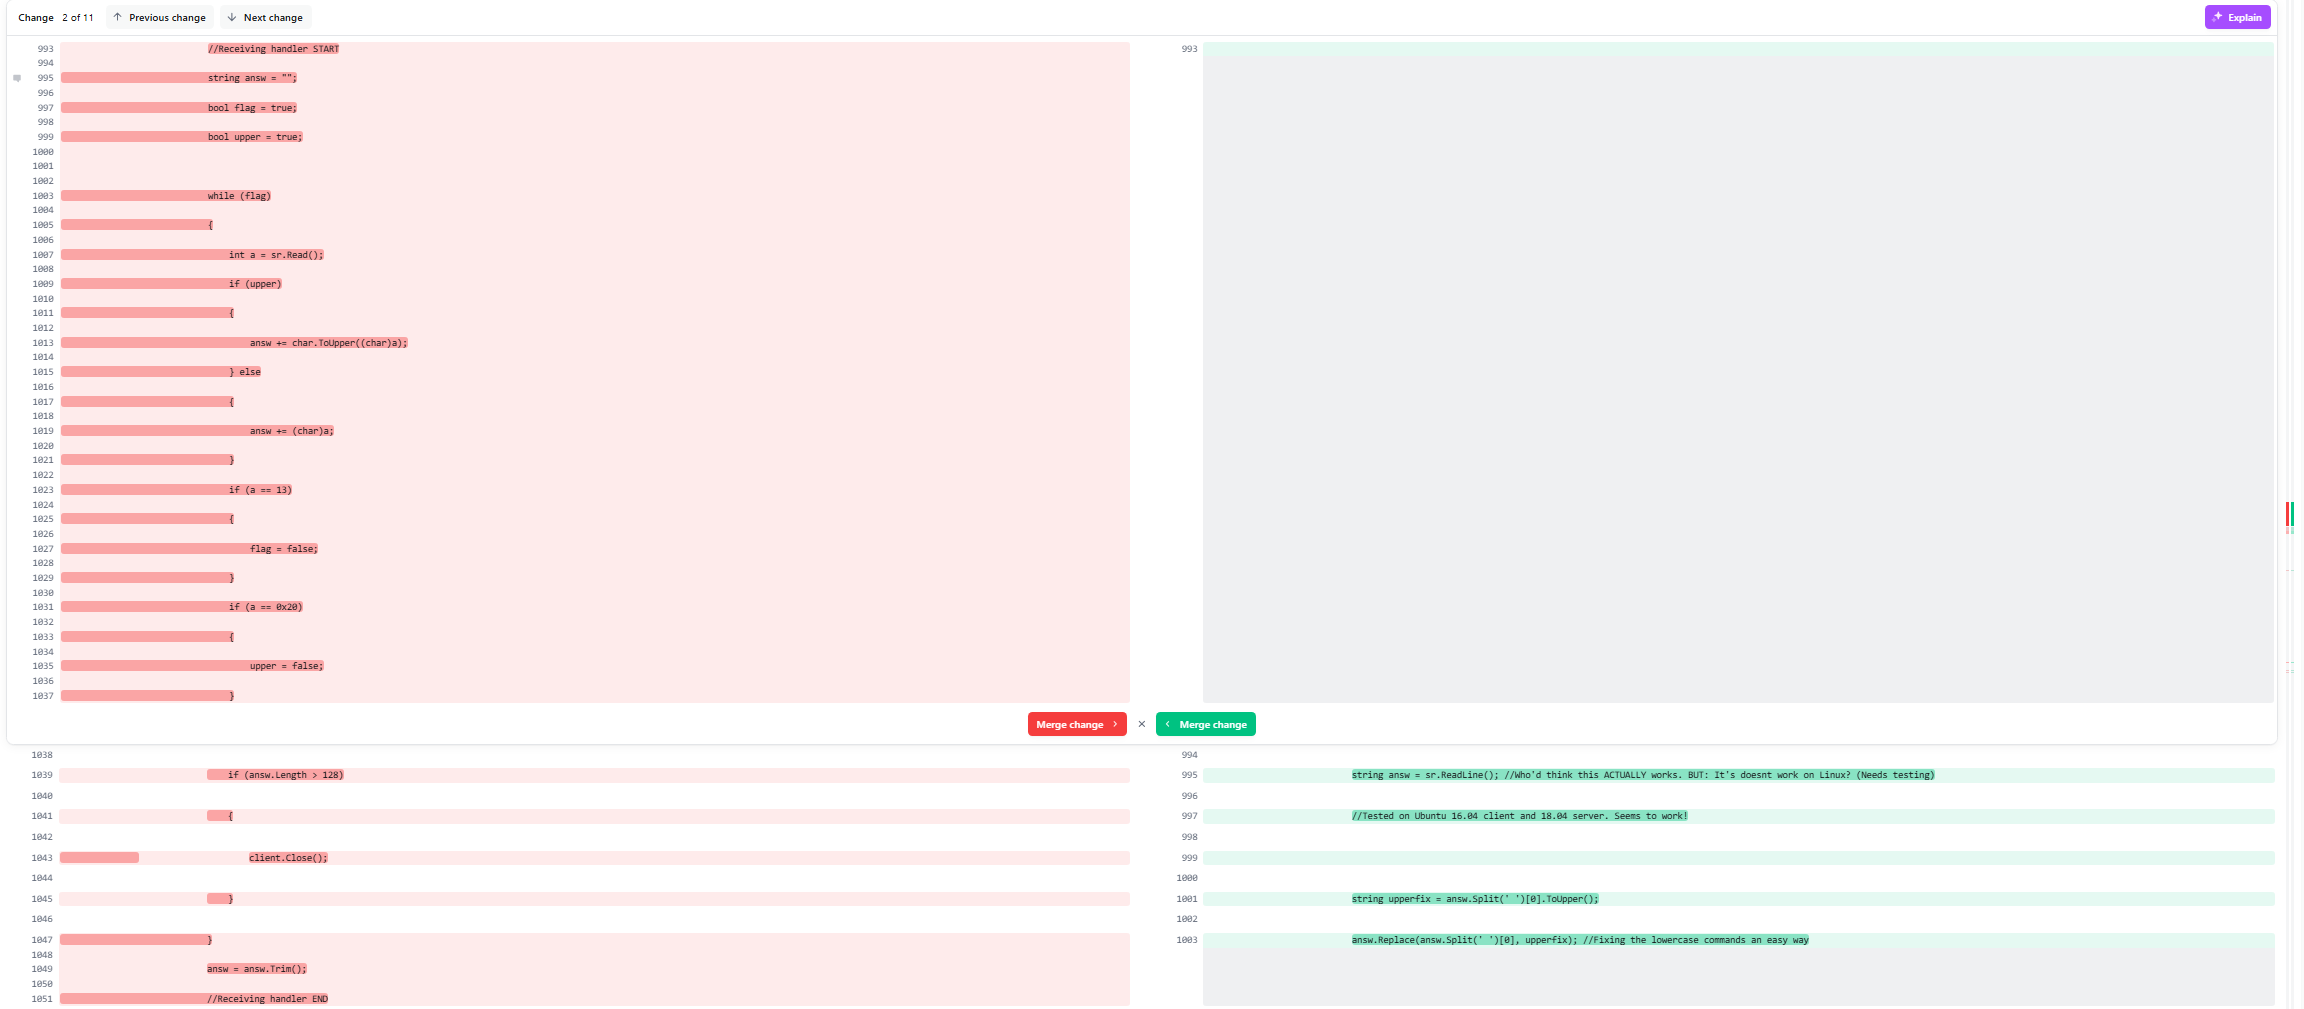

In [44]:
edge_case_1 = synthetic_vulnerable[2]

In [45]:
Markdown(edge_case_1)

```csharp
namespace DatabaseSchemaReader.SqlGen
{
    /// <summary>
    /// Interface for generating DDL scripts for all tables within a database schema.
    /// </summary>
    public interface ICreateTableScriptGenerator
    {
        /// <summary>
        /// Gets or sets a value indicating whether the schema name should be included in the generated DDL.
        /// </summary>
        /// <value>
        ///   <c>true</c> if the schema name should be included; otherwise, <c>false</c>.
        /// </value>
        bool EmitSchemaName { get; set; }

        /// <summary>
        /// Generates the complete DDL script.
        /// </summary>
        /// <returns>The DDL script as a string.</returns>
        string GenerateScript();
    }
}
```

### Let's try a second run:

In [46]:
token_limit = 8192 * 0.80

In [47]:
def filter_out_too_large_code(documents: [str]) -> [str]:
    results = []
    
    for doc in documents:
        # Count the tokens in the input prompt
        token_count = client.models.count_tokens(
            model="gemini-2.0-flash",
            contents=prompt_template.substitute(original_code=doc)
        )

        if token_count.total_tokens <= token_limit:
            results.append(doc)
    return results

In [48]:
filtered_documents_safe = filter_out_too_large_code(random.sample(documents_safe, 5))


In [49]:
for doc in [ transform_code(doc) for doc in filtered_documents_safe ]:
    print(is_vulnerable_oss(doc, 0.65))

(True, 95.21958492696285, 94.28439065814018)
(False, 98.29103574156761, 98.3065515756607)
(True, 97.2935114055872, 97.2847493365407)
(True, 88.53993341326714, 88.45754861831665)
(False, 85.57359129190445, 86.0823705792427)


In [50]:
filtered_documents_vulnerable = filter_out_too_large_code(random.sample(documents_vulnerable, 5))


In [51]:
for doc in [ transform_code(doc) for doc in filtered_documents_vulnerable ]:
    print(is_vulnerable_oss(doc, 0.65))

(True, 96.04725688695908, 95.07889337837696)
(True, 87.0255172252655, 86.91109865903854)
(True, 95.52920572459698, 94.68293748795986)


# Conclusions

The method `is_vulnerable_oss` has demonstrated to be good at querying a database of known OSS with vulnerabilities and finding matches. Sometimes the distance of both embeddings are too similar and we get false positives, but this might be an issue with the validation process using synthetic generated content. More investigation should be done.